In [10]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
import math
import statistics
import h5py
import pickle
import random
from random import randrange

# Lab 7 Section

In [11]:
higgs_data = open("higgs_100000_pt_250_500.pkl",'rb')
higgs = pickle.load(higgs_data)

higgs.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [12]:
qcd_data = open("qcd_100000_pt_250_500.pkl",'rb')
qcd = pickle.load(qcd_data)

qcd.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

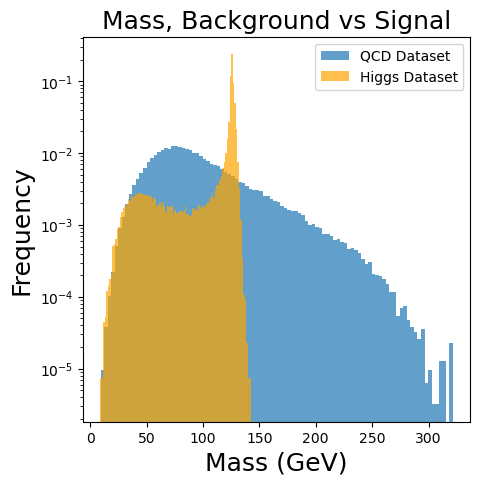

In [13]:
fig, ax = plt.subplots(nrows =1, ncols = 1, figsize = (5,5))


ax.hist(qcd['mass'], 100, alpha = 0.7, label = 'QCD Dataset', density = True)
ax.hist(higgs['mass'], 100, color = 'orange', alpha = 0.7, label = 'Higgs Dataset', density = True)
ax.legend()
ax.set_title('Mass, Background vs Signal', fontsize = 18)
ax.set_ylabel('Frequency', fontsize = 18)
ax.set_xlabel(('Mass (GeV)'), fontsize = 18)
ax.set_yscale('log')
plt.show()

# 1 Make a stacked histogram plot for the feature variable: mass

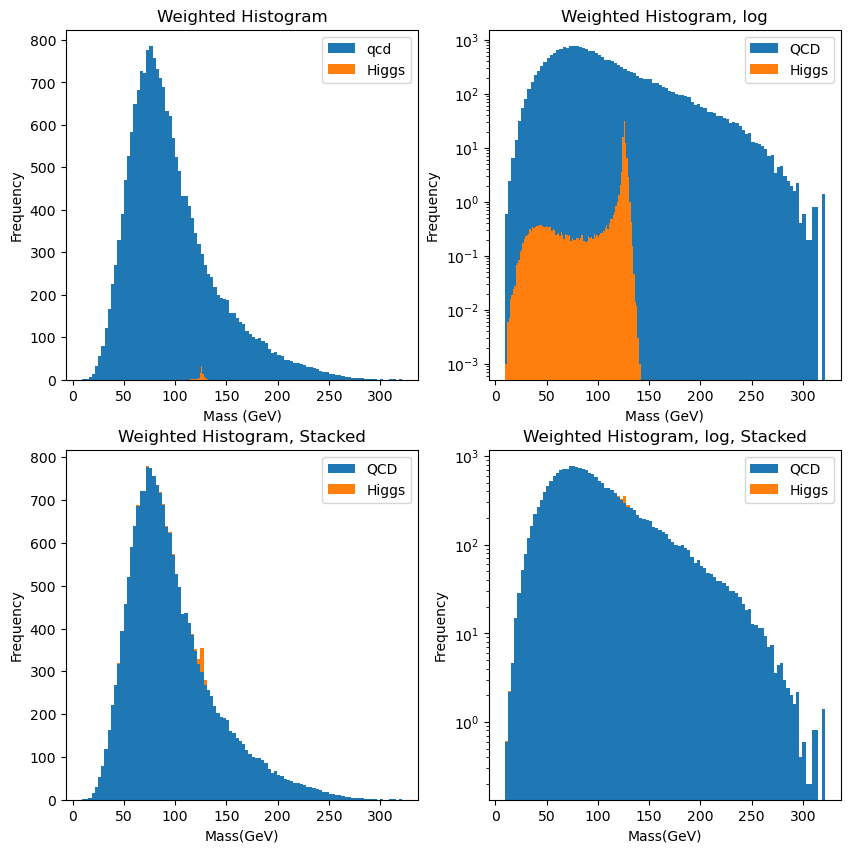

In [14]:
s1 = 20000/100000
s2 = 100/100000
i = np.zeros(100000)
ii = np.zeros(100000)
i[:] = s1
ii[:] = s2
hmass = higgs['mass']
qmass = qcd['mass']
fig, ax = plt.subplots(nrows =2, ncols = 2, figsize = (10,10))

ax[0,0].hist(qmass, weights = i, bins = 100, label = 'qcd')
ax[0,0].hist(hmass, weights = ii, bins = 100, label = 'Higgs')
ax[0,0].set_title('Weighted Histogram')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_xlabel('Mass (GeV)')
ax[0,0].legend()

ax[0,1].hist(qmass, weights = i, bins = 100, label = 'QCD')
ax[0,1].hist(hmass, weights = ii, bins = 100, label = 'Higgs')
ax[0,1].set_title('Weighted Histogram, log')
ax[0,1].set_ylabel('Frequency')
ax[0,1].set_xlabel('Mass (GeV)')
ax[0,1].set_yscale('log')
ax[0,1].legend()

ax[1,0].hist((qmass,hmass), weights = (i,ii), bins = 100, label = ('QCD','Higgs'), stacked = True)
ax[1,0].set_title('Weighted Histogram, Stacked')
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_xlabel('Mass(GeV)')
ax[1,0].legend()

ax[1,1].hist((qmass,hmass), weights = (i,ii), bins = 100, label = ('QCD','Higgs'), stacked = True)
ax[1,1].set_title('Weighted Histogram, log, Stacked')
ax[1,1].set_ylabel('Frequency')
ax[1,1].set_xlabel('Mass(GeV)')
ax[1,1].set_yscale('log')
ax[1,1].legend()
plt.show()

## Evaluate expected significance without any event selection.

    Use Poisson statistics for significance calculation
    Compare the exact significance to the approximation NHiggs/(√NQCD)

 If they are equivalent, explain your findings. 

In [15]:
muq = 20000
val = 20100


prob5sig = 1/3.5e6
val5sig = stats.poisson.ppf(1-prob5sig, muq)
print('Value for 5 Sigma significance: ' + str(val5sig))

sigma20100 = -stats.norm.ppf(1-stats.poisson.cdf(val,muq))
print('Poisson significance of 100 Higgs: '+str(sigma20100))

print('Estimated significance of 100 Higgs: ' +str(100/(20000**(1/2))))

Value for 5 Sigma significance: 20711.0
Poisson significance of 100 Higgs: 0.7112259282313185
Estimated significance of 100 Higgs: 0.7071067811865475


#### Using normal distribution equation of Z = (X - mu)/Sigma
X - mu = N_higgs
Sigma is a root mean squared figure lending itself to sqrt(Nqcd), as such is the width of the peak.
Using NHiggs/(√Nqcd), this produces a strong estimate of our data. Both methods are similar mathematiclly and produce near identical estimates of significance.

# 2 Identify mass cuts to optimize the expected significance.

    Try different mass cuts systematically
    Evaluate expected significance for each set of mass cuts
    Identify the set of mass cuts which give you the highest significance.


In [19]:
hmassnum = hmass
qmassnum = qmass
#print(np.size(hmassnum))
#print(np.size(qmassnum))
#Ratio of points is correct for Nhiggs and Nqcd
####ADD NORMILAZATION FACTOR AT THE END. DIVIDE NP.SIZE(HIGGS) BY NORMALIZATION FACTOR TO KEEP DATA####

## loop evaluating each integer mass for highest significance
start =10
shift = start-1
lst = list(range(start,350,1))
x = 0
index = range(1, np.size(lst))
for xx in lst:
    hcut = hmassnum[hmassnum < xx]
    qcut = qmassnum[qmassnum < xx]
    hsize = np.size(hcut)
    qsize = np.size(qcut)
    sig = hsize/(qsize**(1/2))
    y = np.append(x,sig)
    x = y
a= [range(0,np.size(x)),x]
maxy = (np.max(a[1]))
input_list = x
max_value = np.argmax(input_list)
v = list(zip(lst,y))
print('(Cutting Right) location is ' + str(v[max_value][0]))


start2 = 10
shift2 = start2-1
lst2 = list(range(start2,300,1))
x2 = 0
index = range(1, np.size(lst2))
for xx2 in lst2:
    hcut2 = hmassnum[hmassnum > xx2]
    qcut2 = qmassnum[qmassnum > xx2]
    hsize2 = np.size(hcut2)
    qsize2 = np.size(qcut2)
    sig2 = hsize2/(qsize2**(1/2))
    y2 = np.append(x2,sig2)
    x2 = y2

a2= [range(0,np.size(x2)),x2]
maxy2 = (np.max(a2[1]))
input_list2 = x2
max_value2 = np.argmax(input_list2)
v2 = list(zip(lst2,y2))
print('(Cutting Left) location is ' + str(v2[max_value2][0]))



hcut3 = hmassnum[(hmassnum > v2[max_value2][0]) & (hmassnum < v[max_value][0])]
qcut3 = qmassnum[(qmassnum > v2[max_value2][0]) & (qmassnum < v[max_value][0])]
hsize3 = np.size(hcut3)*0.005
qsize3 = np.size(qcut3)
sig3 = hsize3/(qsize3**(1/2))
print('Significance between cuts '+str(sig3))

(Cutting Right) location is 134
(Cutting Left) location is 121
Significance between cuts 4.982345945367033


# 3 Make two sets of stacked histogram plots for the rest of the features

    Set A without any event selection
        Can you identify another feature as discriminative as mass? (i.e. equal or better significance after feature cut)
    Set B with your optimal mass cuts
        Can you identify another feature to further improve your expected signifiance?


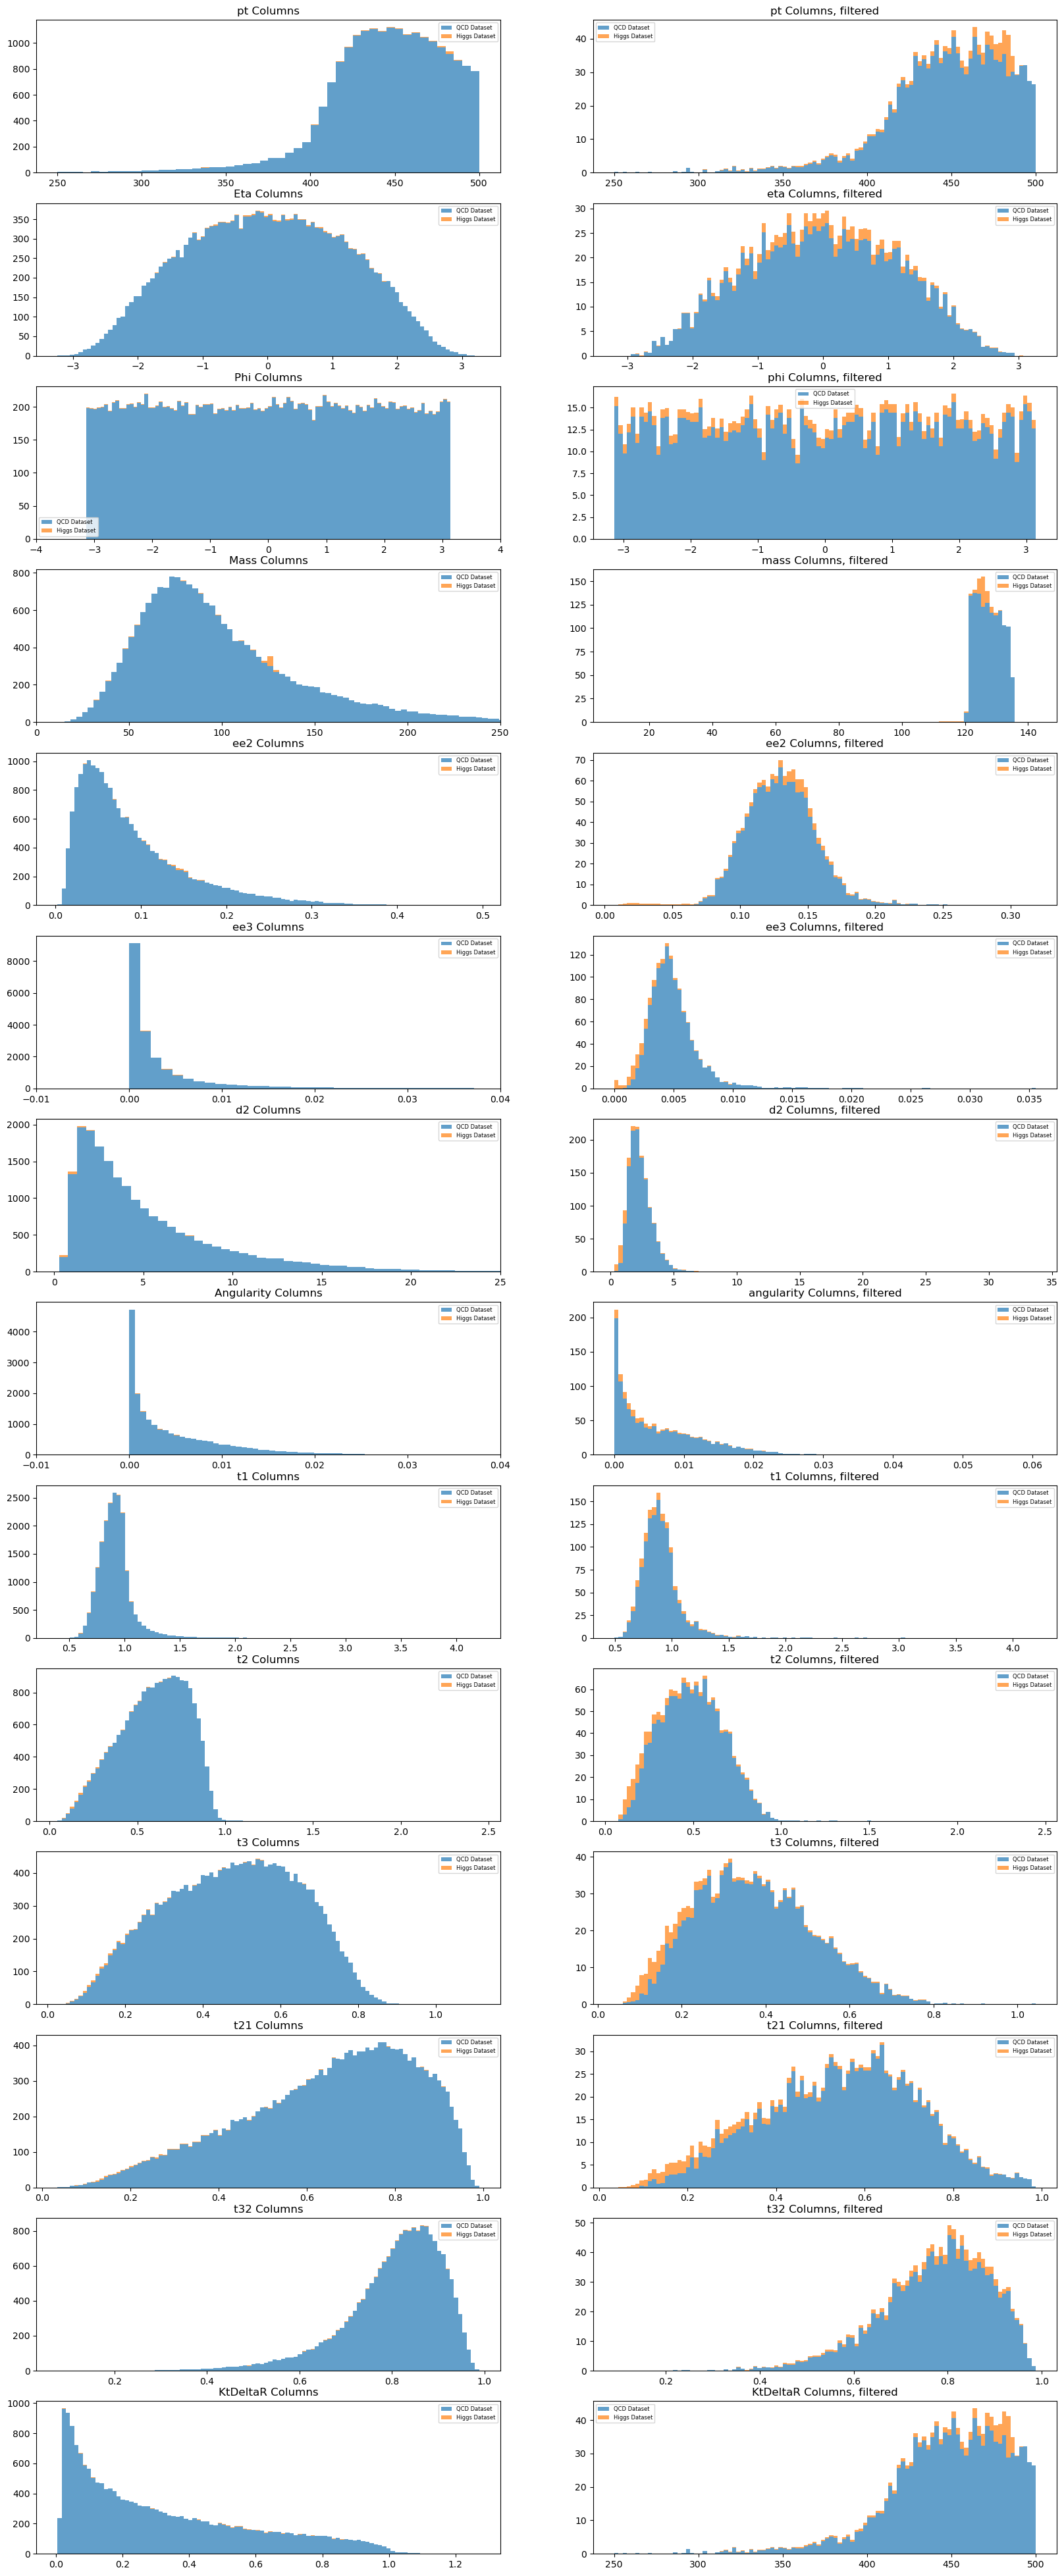

In [20]:
qcd_data_filter =(qcd['mass'] > 121) & (qcd['mass'] < 135)
higgs_data_filter = (higgs['mass'] > 121) & higgs['mass']< 135



s1 = 20000/100000
s2 = 100/100000
i = np.zeros(100000)
ii = np.zeros(100000)
i[:] = s1
ii[:] = s2

fig, ax = plt.subplots(nrows =14, ncols = 2, figsize = (20,50))


ax[0,0].hist((qcd['pt'],higgs['pt']), weights = (i,ii), bins = 50, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[0,0].legend(prop = {'size': 6})
ax[0,0].set_title('pt Columns')

ax[1,0].hist((qcd['eta'],higgs['eta']), weights = (i,ii), bins =100, alpha = 0.7, label = ('QCD Dataset','Higgs Dataset'), stacked = True)
ax[1,0].legend(prop = {'size': 6})
ax[1,0].set_title('Eta Columns')

ax[2,0].hist((qcd['phi'],higgs['phi']),weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[2,0].legend(prop = {'size': 6})
ax[2,0].set_xlim(-4,4)
ax[2,0].set_title('Phi Columns')

ax[3,0].hist((qcd['mass'],higgs['mass']),weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[3,0].legend(prop = {'size': 6})
ax[3,0].set_xlim(0,250)
ax[3,0].set_title('Mass Columns')

ax[4,0].hist((qcd['ee2'],higgs['ee2']), weights = (i,ii), bins =100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[4,0].legend(prop = {'size': 6})
ax[4,0].set_title('ee2 Columns')

ax[5,0].hist((qcd['ee3'],higgs['ee3']), weights = (i,ii), bins =100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[5,0].set_xlim(-0.01,0.04)
ax[5,0].legend(prop = {'size': 6})
ax[5,0].set_title('ee3 Columns')

ax[6,0].hist((qcd['d2'],higgs['d2']), weights = (i,ii), bins =200, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[6,0].legend(prop = {'size': 6})
ax[6,0].set_xlim(-1,25)
ax[6,0].set_title('d2 Columns')

ax[7,0].hist((qcd['angularity'],higgs['angularity']), weights = (i,ii), bins =100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[7,0].legend(prop = {'size': 6})
ax[7,0].set_xlim(-0.01,0.04)
ax[7,0].set_title('Angularity Columns')

ax[8,0].hist((qcd['t1'],higgs['t1']), weights = (i,ii), bins =100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[8,0].legend(prop = {'size': 6})
ax[8,0].set_title('t1 Columns')

ax[9,0].hist((qcd['t2'],higgs['t2']), weights = (i,ii), bins =100, alpha = 0.7, label =('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[9,0].legend(prop = {'size': 6})
ax[9,0].set_title('t2 Columns')

ax[10,0].hist((qcd['t3'],higgs['t3']), weights = (i,ii), bins =100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[10,0].legend(prop = {'size': 6})
ax[10,0].set_title('t3 Columns')

ax[11,0].hist((qcd['t21'],higgs['t21']), weights = (i,ii), bins =100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'),stacked = True)
ax[11,0].legend(prop = {'size': 6})
ax[11,0].set_title('t21 Columns')

ax[12,0].hist((qcd['t32'],higgs['t32']), weights = (i,ii), bins =100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[12,0].legend(prop = {'size': 6})
ax[12,0].set_title('t32 Columns')

ax[13,0].hist((qcd['KtDeltaR'],higgs['KtDeltaR']), weights = (i,ii), bins =100, alpha = 0.7, label =('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[13,0].legend(prop = {'size': 6})
ax[13,0].set_title('KtDeltaR Columns')


qpt_filt = qcd['pt'][qcd_data_filter]
hpt_filt = higgs['pt'][higgs_data_filter]

i = np.zeros(np.size(qpt_filt))
ii = np.zeros(np.size(hpt_filt))
i[:] = s1
ii[:] = s2
ax[0,1].hist((qpt_filt,hpt_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[0,1].legend(prop = {'size': 6})
ax[0,1].set_title('pt Columns, filtered')

qeta_filt = qcd['eta'][qcd_data_filter]
heta_filt = higgs['eta'][higgs_data_filter]

i = np.zeros(np.size(qeta_filt))
ii = np.zeros(np.size(heta_filt))
i[:] = s1
ii[:] = s2
ax[1,1].hist((qeta_filt,heta_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[1,1].legend(prop = {'size': 6})
ax[1,1].set_title('eta Columns, filtered')

qphi_filt = qcd['phi'][qcd_data_filter]
hphi_filt = higgs['phi'][higgs_data_filter]

i = np.zeros(np.size(qphi_filt))
ii = np.zeros(np.size(hphi_filt))
i[:] = s1
ii[:] = s2
ax[2,1].hist((qphi_filt,hphi_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[2,1].legend(prop = {'size': 6})
ax[2,1].set_title('phi Columns, filtered')

qmass_filt = qcd['mass'][qcd_data_filter]
hmass_filt = higgs['mass'][higgs_data_filter]

i = np.zeros(np.size(qmass_filt))
ii = np.zeros(np.size(hmass_filt))
i[:] = s1
ii[:] = s2
ax[3,1].hist((qmass_filt,hmass_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[3,1].legend(prop = {'size': 6})
ax[3,1].set_title('mass Columns, filtered')

qee2_filt = qcd['ee2'][qcd_data_filter]
hee2_filt = higgs['ee2'][higgs_data_filter]

i = np.zeros(np.size(qee2_filt))
ii = np.zeros(np.size(hee2_filt))
i[:] = s1
ii[:] = s2
ax[4,1].hist((qee2_filt,hee2_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[4,1].legend(prop = {'size': 6})
ax[4,1].set_title('ee2 Columns, filtered')

qee3_filt = qcd['ee3'][qcd_data_filter]
hee3_filt = higgs['ee3'][higgs_data_filter]

i = np.zeros(np.size(qee3_filt))
ii = np.zeros(np.size(hee3_filt))
i[:] = s1
ii[:] = s2
ax[5,1].hist((qee3_filt,hee3_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[5,1].legend(prop = {'size': 6})
ax[5,1].set_title('ee3 Columns, filtered')

qd2_filt = qcd['d2'][qcd_data_filter]
hd2_filt = higgs['d2'][higgs_data_filter]

i = np.zeros(np.size(qd2_filt))
ii = np.zeros(np.size(hd2_filt))
i[:] = s1
ii[:] = s2
ax[6,1].hist((qd2_filt,hd2_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[6,1].legend(prop = {'size': 6})
ax[6,1].set_title('d2 Columns, filtered')

qangularity_filt = qcd['angularity'][qcd_data_filter]
hangularity_filt = higgs['angularity'][higgs_data_filter]

i = np.zeros(np.size(qangularity_filt))
ii = np.zeros(np.size(hangularity_filt))
i[:] = s1
ii[:] = s2
ax[7,1].hist((qangularity_filt,hangularity_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[7,1].legend(prop = {'size': 6})
ax[7,1].set_title('angularity Columns, filtered')

qt1_filt = qcd['t1'][qcd_data_filter]
ht1_filt = higgs['t1'][higgs_data_filter]

i = np.zeros(np.size(qt1_filt))
ii = np.zeros(np.size(ht1_filt))
i[:] = s1
ii[:] = s2
ax[8,1].hist((qt1_filt,ht1_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[8,1].legend(prop = {'size': 6})
ax[8,1].set_title('t1 Columns, filtered')

qt2_filt = qcd['t2'][qcd_data_filter]
ht2_filt = higgs['t2'][higgs_data_filter]

i = np.zeros(np.size(qt2_filt))
ii = np.zeros(np.size(ht2_filt))
i[:] = s1
ii[:] = s2
ax[9,1].hist((qt2_filt,ht2_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[9,1].legend(prop = {'size': 6})
ax[9,1].set_title('t2 Columns, filtered')

qt3_filt = qcd['t3'][qcd_data_filter]
ht3_filt = higgs['t3'][higgs_data_filter]

i = np.zeros(np.size(qt3_filt))
ii = np.zeros(np.size(ht3_filt))
i[:] = s1
ii[:] = s2
ax[10,1].hist((qt3_filt,ht3_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[10,1].legend(prop = {'size': 6})
ax[10,1].set_title('t3 Columns, filtered')

qt21_filt = qcd['t21'][qcd_data_filter]
ht21_filt = higgs['t21'][higgs_data_filter]

i = np.zeros(np.size(qt21_filt))
ii = np.zeros(np.size(ht21_filt))
i[:] = s1
ii[:] = s2
ax[11,1].hist((qt21_filt,ht21_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[11,1].legend(prop = {'size': 6})
ax[11,1].set_title('t21 Columns, filtered')

qt32_filt = qcd['t32'][qcd_data_filter]
ht32_filt = higgs['t32'][higgs_data_filter]

i = np.zeros(np.size(qt32_filt))
ii = np.zeros(np.size(ht32_filt))
i[:] = s1
ii[:] = s2
ax[12,1].hist((qt32_filt,ht32_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[12,1].legend(prop = {'size': 6})
ax[12,1].set_title('t32 Columns, filtered')

qKtDeltaR_filt = qcd['KtDeltaR'][qcd_data_filter]
hKtDeltaR_filt = higgs['KtDeltaR'][higgs_data_filter]

i = np.zeros(np.size(qKtDeltaR_filt))
ii = np.zeros(np.size(hKtDeltaR_filt))
i[:] = s1
ii[:] = s2
ax[13,1].hist((qpt_filt,hpt_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[13,1].legend(prop = {'size': 6})
ax[13,1].set_title('KtDeltaR Columns, filtered')



plt.show()

### It is difficult to see any data sets with a feature as prominent as mass in the non-cut data. the ee2 dataset has a slight amount of prominence in a small area, but this feature is very slight.

### Within the cut data, pt, ee2, ee3, t3, t21, and KtDeltaR all may have data that is significant.

# 4 Optimize event selections using multiple features (if necessary)

    Find a set of feature cuts which achieve high expected significance.
    Compare significance (before/after event selection) derived in your pT samples to your lab partner. Describe your findings.


In [24]:
#using pT data set
qpt_filt = qcd['pt'][qcd_data_filter]
hpt_filt = higgs['pt'][higgs_data_filter]
hpt = hpt_filt
qpt = qpt_filt

hptnum = hpt
qptnum = qpt
#Ratio of points is correct for Nhiggs and Nqcd


## loop evaluating each integer mass for highest significance
start =450
shift = start-1
lst = list(range(start,500,1))
x = 0
index = range(1, np.size(lst))
for xx in lst:
    hcut = hptnum[hptnum < xx]
    qcut = qptnum[qptnum < xx]
    hsize = np.size(hcut)
    qsize = np.size(qcut)
    sig = hsize/(qsize**(1/2))
    y = np.append(x,sig)
    x = y
a= [range(0,np.size(x)),x]
maxy = (np.max(a[1]))
input_list = x
max_value = np.argmax(input_list)
v = list(zip(lst,y))
print('(Cutting Right) location is ' + str(v[max_value][0]))


start2 = 450
shift2 = start2-1
lst2 = list(range(start2,500,1))
x2 = 0
index = range(1, np.size(lst2))
for xx2 in lst2:
    hcut2 = hptnum[hptnum > xx2]
    qcut2 = qptnum[qptnum > xx2]
    hsize2 = np.size(hcut2)
    qsize2 = np.size(qcut2)
    sig2 = hsize2/(qsize2**(1/2))
    y2 = np.append(x2,sig2)
    x2 = y2

a2= [range(0,np.size(x2)),x2]
maxy2 = (np.max(a2[1]))
input_list2 = x2
max_value2 = np.argmax(input_list2)
v2 = list(zip(lst2,y2))
print('(Cutting Left) location is ' + str(v2[max_value2][0]))


hcut3 = hptnum[(hptnum > v2[max_value2][0]) & (hptnum < v[max_value][0])]
qcut3 = qptnum[(qptnum > v2[max_value2][0]) & (qptnum < v[max_value][0])]
hsize3 = np.size(hcut3)*0.005
qsize3 = np.size(qcut3)
sig3 = hsize3/(qsize3**(1/2))
print('Significance between cuts '+str(sig3) +' sigma')

(Cutting Right) location is 488
(Cutting Left) location is 453
Significance between cuts 6.295303887706746 sigma


Comparing to lab partner:

Using only mass:
I produced a 4.98 sigma significance. My lab partner prodcued a 4.47 sigma significance.
Using mass and pt, I produced a 6.3 sigma signifcance. My lab partner produced a 8.24 sigma significance.

The results are slightly different but we are seeing the same trends that analyzing more data features allows for increased signal confidence. This makes sense due to different data sets being used, and different analysis methods used.

# Lab 8 Section

In [36]:
highl = h5py.File('data_highLumi_pt_250_500.h5', 'r')
highl.keys()

<KeysViewHDF5 ['data']>

In [37]:
lowl = h5py.File('data_lowLumi_pt_250_500.h5', 'r')
lowl.keys()

<KeysViewHDF5 ['data']>

In [38]:
datah = np.array(highl.get('data'))
print(datah)

datal = np.array(lowl.get('data'))
print(datal)

['axis0' 'axis1' 'block0_items' 'block0_values']
['axis0' 'axis1' 'block0_items' 'block0_values']


In [39]:
hdata = highl['data']
list(hdata)

a = np.array(hdata['block0_items'])
pd.DataFrame(a)

b = np.array(hdata['block0_values'])
pd.DataFrame(b)

pth = b[:,0]
etah = b[:,1]
phih = b[:,2]
massh = b[:,3]
ee2h = b[:,4]
ee3h  = b[:,5]
d2h = b[:,6]
angularityh = b[:,7]
t1h = b[:,8]
t2h = b[:,9]
t3h = b[:,10]
t21h = b[:,11]
t32h = b[:,12]
KtDeltaRh = b[:,13]

In [40]:
ldata = lowl['data']
list(hdata)

c = np.array(ldata['block0_items'])
pd.DataFrame(c)

d = np.array(ldata['block0_values'])
pd.DataFrame(d)

ptl = d[:,0]
etal = d[:,1]
phil = d[:,2]
massl = d[:,3]
ee2l = d[:,4]
ee3l  = d[:,5]
d2l = d[:,6]
angularityl = d[:,7]
t1l = d[:,8]
t2l = d[:,9]
t3l = d[:,10]
t21l = d[:,11]
t32l = d[:,12]
KtDeltaRl = d[:,13]

In [41]:
higgs_data = open("higgs_100000_pt_250_500.pkl",'rb')
higgs = pickle.load(higgs_data)

higgs.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [42]:
qcd_data = open("qcd_100000_pt_250_500.pkl",'rb')
qcd = pickle.load(qcd_data)

qcd.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

## High luminosity data

    For each feature of your event selection, plot the observed data overlapped with expected signal and background (normalized to observed yields) with/without event selection.

In [43]:
#Normalizing factors
print(np.size(massh))
print(np.size(massl))
print(np.size(higgs['mass']))


sh1 = 40344/1.005/100000 #weight for qcd data
sh2 = (40344/1.005)*0.005/100000 #weight for higgs data
sh3 = 1 #weight for highlum
sh4 = 1 #weight for lowlum
i = np.zeros(100000)
ii = np.zeros(100000)
iii = np.zeros(np.size(massl))
iiii = np.zeros(np.size(massh))
i[:] = sh1
ii[:] = sh2
iii[:] = sh3
iiii[:] = sh4

low_color = 'orange'
high_color = 'orange'
higgs_color = 'blue'

alpha_l = 1
alpha_h = 1
alpha_qcd = 1
alpha_higgs = 0.7

40344
4060
100000


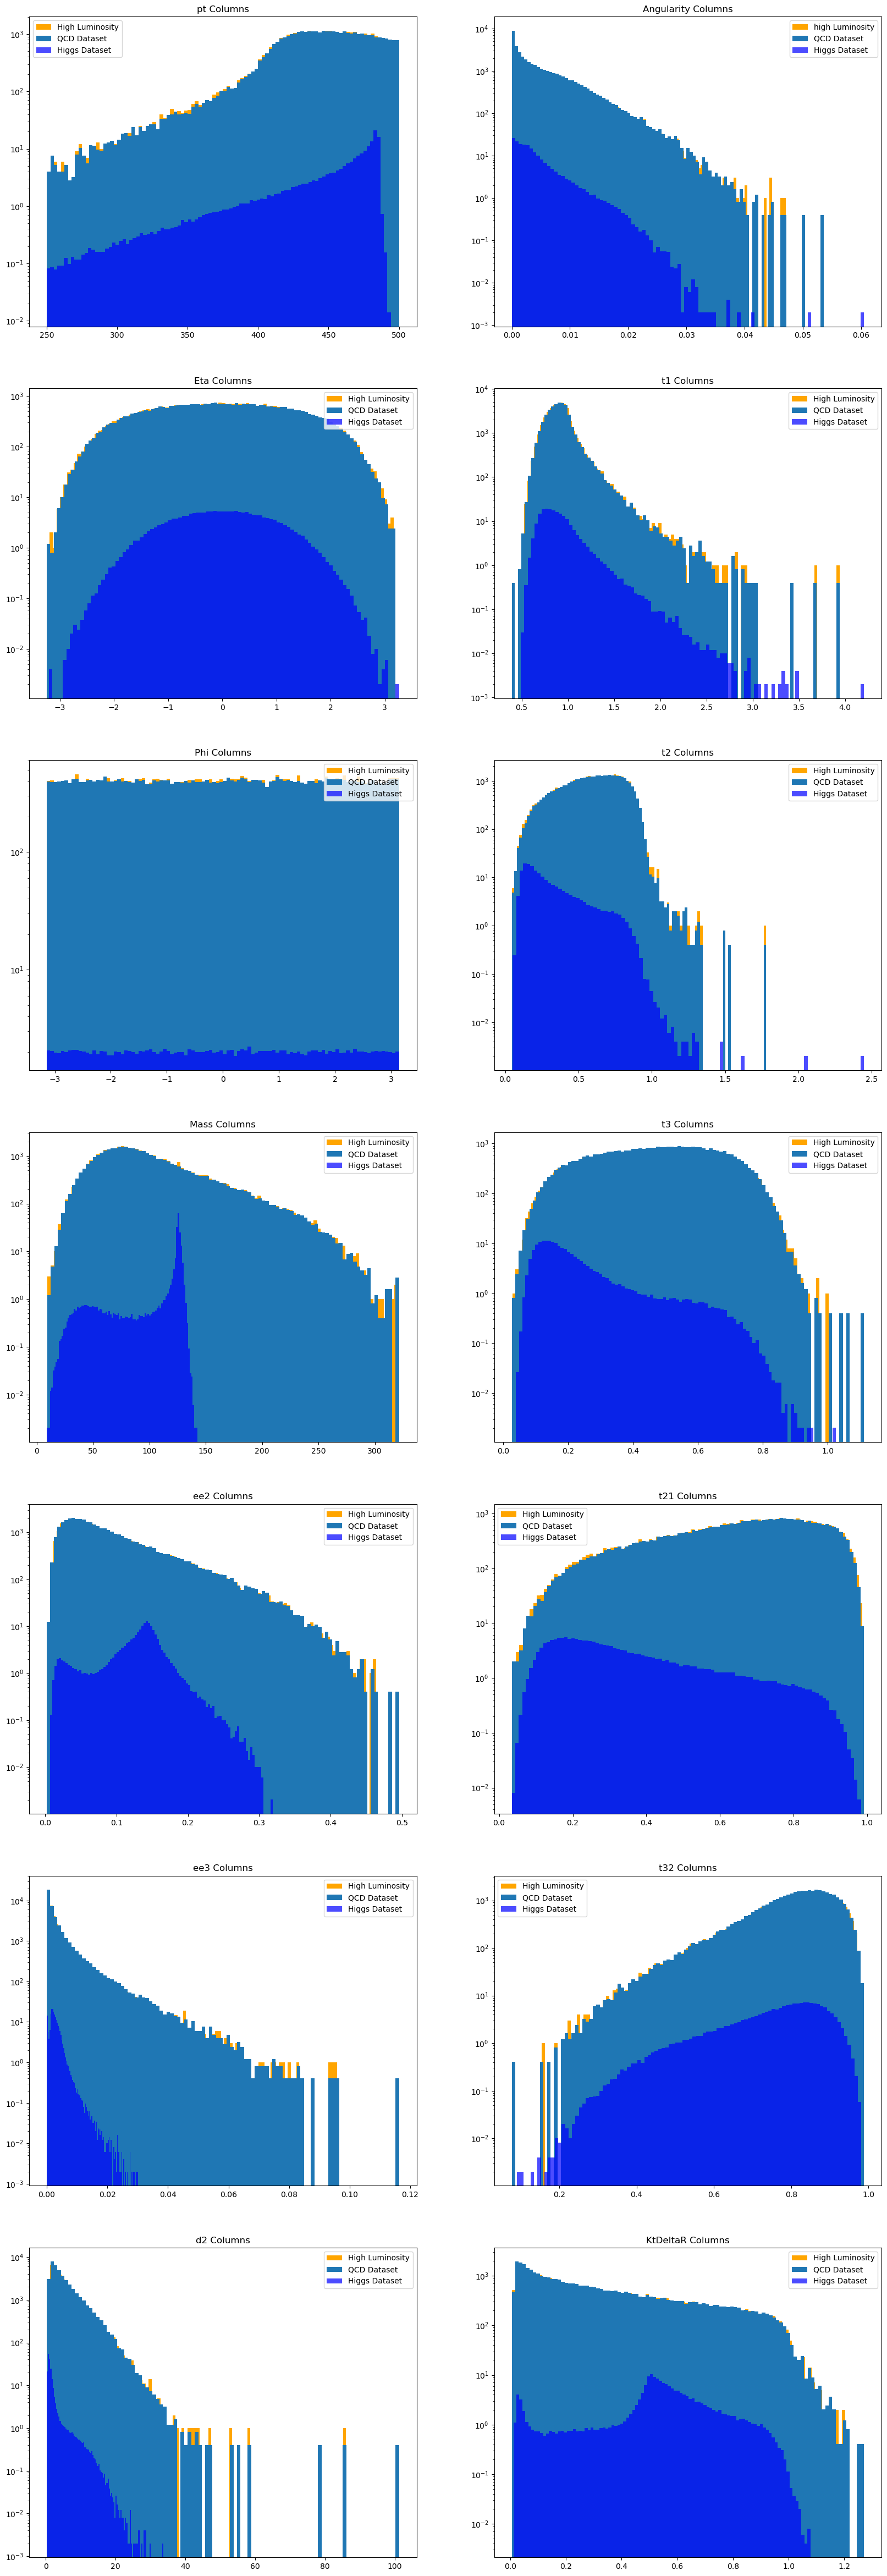

In [44]:
fig, ax = plt.subplots(nrows =7, ncols = 2, figsize = (20,60))

ax[0,0].hist(pth, 100, weights = iiii, color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[0,0].hist(qcd['pt'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[0,0].hist(higgs['pt'], 100, weights = ii,color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[0,0].legend()
ax[0,0].set_yscale('log')
ax[0,0].set_title('pt Columns')

ax[1,0].hist(etah, 100, weights = iiii,color = high_color, alpha =alpha_h, label = 'High Luminosity', density = False)
ax[1,0].hist(qcd['eta'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[1,0].hist(higgs['eta'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[1,0].legend()
ax[1,0].set_yscale('log')
ax[1,0].set_title('Eta Columns')

ax[2,0].hist(phih, 100, weights = iiii,color = high_color, alpha =alpha_h, label = 'High Luminosity', density = False)
ax[2,0].hist(qcd['phi'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[2,0].hist(higgs['phi'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[2,0].legend()
ax[2,0].set_yscale('log')
ax[2,0].set_title('Phi Columns')

ax[3,0].hist(massh, 100, weights = iiii,color =high_color, alpha =alpha_h, label = 'High Luminosity', density = False)
ax[3,0].hist(qcd['mass'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[3,0].hist(higgs['mass'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[3,0].legend()
ax[3,0].set_yscale('log')
ax[3,0].set_title('Mass Columns')

ax[4,0].hist(ee2h, 100,weights = iiii, color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[4,0].hist(qcd['ee2'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[4,0].hist(higgs['ee2'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[4,0].legend()
ax[4,0].set_yscale('log')
ax[4,0].set_title('ee2 Columns')

ax[5,0].hist(ee3h, 100,weights = iiii, color = high_color, alpha =alpha_h, label = 'High Luminosity', density = False)
ax[5,0].hist(qcd['ee3'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[5,0].hist(higgs['ee3'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[5,0].legend()
ax[5,0].set_yscale('log')
ax[5,0].set_title('ee3 Columns')

ax[6,0].hist(d2h, 100,weights = iiii, color =high_color, alpha = alpha_h, label = 'High Luminosity', density =False)
ax[6,0].hist(qcd['d2'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[6,0].hist(higgs['d2'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[6,0].legend()
ax[6,0].set_yscale('log')
ax[6,0].set_title('d2 Columns')

ax[0,1].hist(angularityh, 100, weights = iiii, color = high_color, alpha = alpha_h, label = 'high Luminosity', density = False)
ax[0,1].hist(qcd['angularity'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[0,1].hist(higgs['angularity'], 100, weights = ii, color = higgs_color, alpha =alpha_higgs, label = 'Higgs Dataset', density = False)
ax[0,1].legend()
ax[0,1].set_yscale('log')
ax[0,1].set_title('Angularity Columns')

ax[1,1].hist(t1h, 100,weights = iiii, color =high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[1,1].hist(qcd['t1'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[1,1].hist(higgs['t1'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[1,1].legend()
ax[1,1].set_yscale('log')
ax[1,1].set_title('t1 Columns')

ax[2,1].hist(t2h, 100,weights = iiii, color = high_color, alpha =alpha_h, label = 'High Luminosity', density = False)
ax[2,1].hist(qcd['t2'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[2,1].hist(higgs['t2'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[2,1].legend()
ax[2,1].set_yscale('log')
ax[2,1].set_title('t2 Columns')

ax[3,1].hist(t3h, 100, weights = iiii,color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[3,1].hist(qcd['t3'], 100, weights = i, alpha =alpha_qcd, label = 'QCD Dataset', density = False)
ax[3,1].hist(higgs['t3'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[3,1].legend()
ax[3,1].set_yscale('log')
ax[3,1].set_title('t3 Columns')

ax[4,1].hist(t21h, 100,weights = iiii, color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[4,1].hist(qcd['t21'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[4,1].hist(higgs['t21'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[4,1].legend()
ax[4,1].set_yscale('log')
ax[4,1].set_title('t21 Columns')

ax[5,1].hist(t32h, 100,weights = iiii, color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[5,1].hist(qcd['t32'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[5,1].hist(higgs['t32'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[5,1].legend()
ax[5,1].set_yscale('log')
ax[5,1].set_title('t32 Columns')

ax[6,1].hist(KtDeltaRh, 100, weights = iiii, color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[6,1].hist(qcd['KtDeltaR'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[6,1].hist(higgs['KtDeltaR'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[6,1].legend()
ax[6,1].set_yscale('log')
ax[6,1].set_title('KtDeltaR Columns')
plt.show()

Im looking for graphs in which features present in the dark blue (expected signals) correlate with features present in the orange (measured data) when compared against the light blue (expected background)

pt, mass, t2, t3, t21, have candidates in High luminosity data

In [46]:
#for mass
start = 100
end = 150
#shift = start-1
lst = list(range(start,end,1))

x = 0
for xx in lst:
    Lcut = massh[massh < xx]
    qcut = qcd['mass'][qcd['mass'] < xx]
    qsize = (np.size(qcut))*sh1
    Lsize = (np.size(Lcut))-qsize
    sig = (Lsize)/(qsize**(1/2))
    y = np.append(x,sig)
    x = y
a= [range(0,np.size(x)),x]
maxy = (np.max(a[1]))
input_list = x
max_value = np.argmax(input_list)
v = list(zip(lst,y))
print('(Cutting Right) location and significance is ' + str(v[max_value]))




lst2 = list(range(start,end,1))
x2 = 0
index = range(1, np.size(lst2))
for xx2 in lst2:
    Lcut2 = massh[massh > xx2]
    qcut2 = qcd['mass'][qcd['mass'] > xx2]
    qsize2 = (np.size(qcut2))*sh1
    Lsize2 = (np.size(Lcut2))-qsize2
    sig2 = Lsize2/(qsize2**(1/2))
    y2 = np.append(x2,sig2)
    x2 = y2
a2= [range(0,np.size(x2)),x2]
maxy2 = (np.max(a2[1]))
input_list2 = x2
max_value2 = np.argmax(input_list2)
v2 = list(zip(lst2,y2))
print('(Cutting Left) location and significance is ' + str(v2[max_value2]))



Lcut3 = massh[(massh > v2[max_value2][0]) & (massh < v[max_value][0])]
qcut3 = qcd['mass'][(qcd['mass'] > v2[max_value2][0]) & (qcd['mass'] < v[max_value][0])]
qsize3 = np.size(qcut3)*sh1
Lsize3 = np.size(Lcut3)-qsize3
sig3 = Lsize3/(qsize3**(1/2))
print('Significance between cuts '+str(sig3))

(Cutting Right) location and significance is (131, 1.1755147271812971)
(Cutting Left) location and significance is (124, 1.703154713352068)
Significance between cuts 4.440042592968541


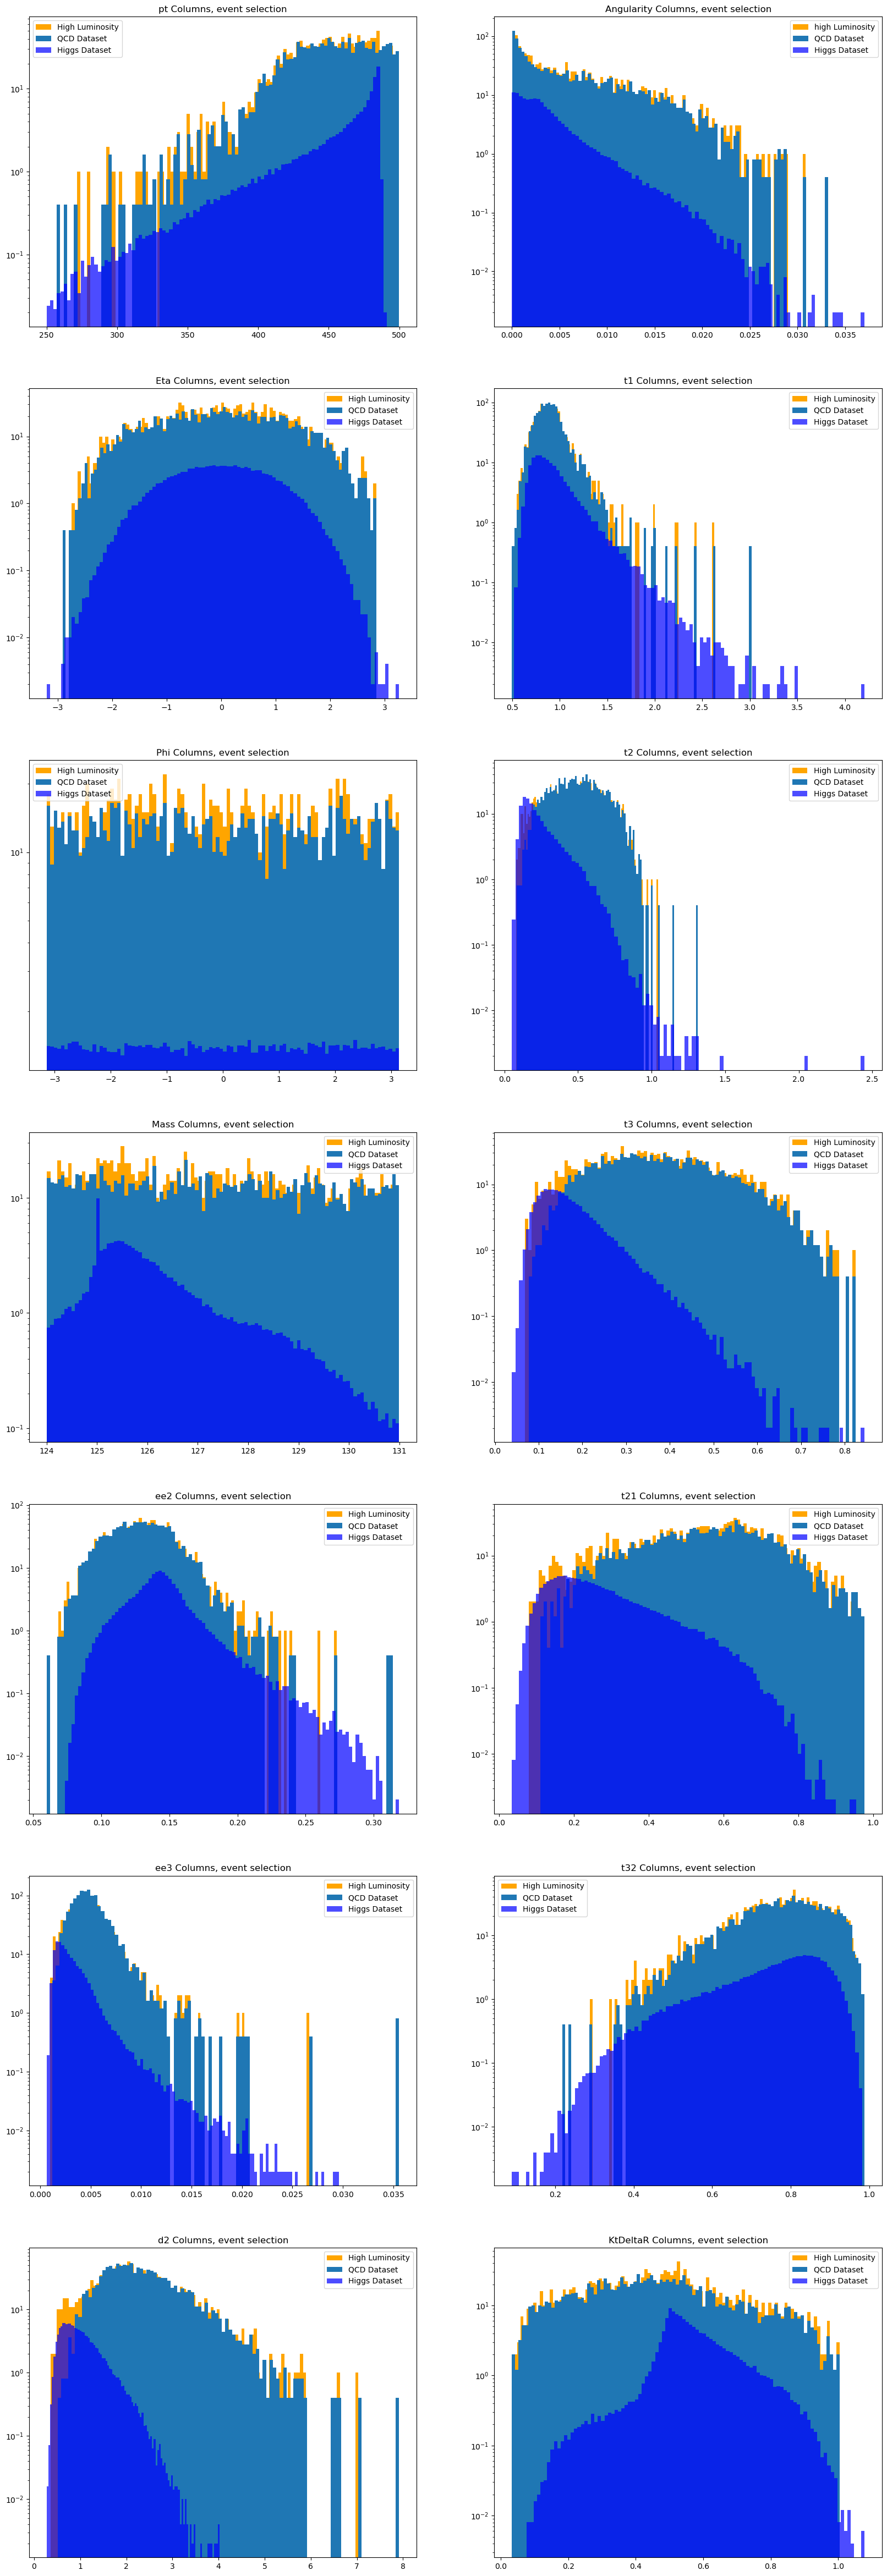

In [47]:
#plotting each feature given mass event selection
qcd_data_filter =(qcd['mass'] > 124) & (qcd['mass'] < 131)
hlum_data_filter = (massh > 124) & (massh < 131)
higgs_data_filter = (higgs['mass'] > 124) & (higgs['mass'] <131)


fig, ax = plt.subplots(nrows =7, ncols = 2, figsize = (20,60))

qpt_filt = qcd['pt'][qcd_data_filter]
hpt_filt = higgs['pt'][higgs_data_filter]
pthl_filt = pth[hlum_data_filter]
i = np.zeros(np.size(qpt_filt))
ii = np.zeros(np.size(hpt_filt))
iiii = np.zeros(np.size(pthl_filt))
s1 = 40344/1.005/100000
s2 = (40344/1.005)*0.005/100000
s3 = 1
i[:] = sh1
ii[:] = sh2
iiii[:] = sh4
ax[0,0].hist(pthl_filt, 100, weights = iiii, color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[0,0].hist(qpt_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[0,0].hist(hpt_filt, 100, weights = ii,color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[0,0].legend()
ax[0,0].set_yscale('log')
ax[0,0].set_title('pt Columns, event selection')

qeta_filt = qcd['eta'][qcd_data_filter]
heta_filt = higgs['eta'][higgs_data_filter]
etahl_filt = etah[hlum_data_filter]
i = np.zeros(np.size(qpt_filt))
ii = np.zeros(np.size(hpt_filt))
iii = np.zeros(np.size(etahl_filt))
i[:] = sh1
ii[:] = sh2
iiii[:] = sh4
ax[1,0].hist(etahl_filt, 100, weights = iiii,color = high_color, alpha =alpha_h, label = 'High Luminosity', density = False)
ax[1,0].hist(qeta_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[1,0].hist(heta_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[1,0].legend()
ax[1,0].set_yscale('log')
ax[1,0].set_title('Eta Columns, event selection')

qphi_filt = qcd['phi'][qcd_data_filter]
hphi_filt = higgs['phi'][higgs_data_filter]
phihl_filt = phih[hlum_data_filter]
i = np.zeros(np.size(qpt_filt))
ii = np.zeros(np.size(hpt_filt))
iii = np.zeros(np.size(phihl_filt))
i[:] = sh1
ii[:] = sh2
iiii[:] = sh4
ax[2,0].hist(phihl_filt, 100, weights = iiii,color = high_color, alpha =alpha_h, label = 'High Luminosity', density = False)
ax[2,0].hist(qphi_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[2,0].hist(hphi_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[2,0].legend()
ax[2,0].set_yscale('log')
ax[2,0].set_title('Phi Columns, event selection')

qmass_filt = qcd['mass'][qcd_data_filter]
hmass_filt = higgs['mass'][higgs_data_filter]
masshl_filt = massh[hlum_data_filter]
i = np.zeros(np.size(qmass_filt))
ii = np.zeros(np.size(hmass_filt))
iii = np.zeros(np.size(masshl_filt))
i[:] = sh1
ii[:] = sh2
iiii[:] = sh4
ax[3,0].hist(masshl_filt, 100, weights = iiii,color =high_color, alpha =alpha_h, label = 'High Luminosity', density = False)
ax[3,0].hist(qmass_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[3,0].hist(hmass_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[3,0].legend()
ax[3,0].set_yscale('log')
ax[3,0].set_title('Mass Columns, event selection')

qee2_filt = qcd['ee2'][qcd_data_filter]
hee2_filt = higgs['ee2'][higgs_data_filter]
ee2hl_filt = ee2h[hlum_data_filter]
i = np.zeros(np.size(qee2_filt))
ii = np.zeros(np.size(hee2_filt))
iii = np.zeros(np.size(ee2hl_filt))
i[:] = sh1
ii[:] = sh2
iiii[:] = sh4
ax[4,0].hist(ee2hl_filt, 100,weights = iiii, color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[4,0].hist(qee2_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[4,0].hist(hee2_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[4,0].legend()
ax[4,0].set_yscale('log')
ax[4,0].set_title('ee2 Columns, event selection')

qee3_filt = qcd['ee3'][qcd_data_filter]
hee3_filt = higgs['ee3'][higgs_data_filter]
ee3hl_filt = ee3h[hlum_data_filter]
i = np.zeros(np.size(qee3_filt))
ii = np.zeros(np.size(hee3_filt))
iii = np.zeros(np.size(ee3hl_filt))
i[:] = sh1
ii[:] = sh2
iiii[:] = sh4
ax[5,0].hist(ee3hl_filt, 100,weights = iiii, color = high_color, alpha =alpha_h, label = 'High Luminosity', density = False)
ax[5,0].hist(qee3_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[5,0].hist(hee3_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[5,0].legend()
ax[5,0].set_yscale('log')
ax[5,0].set_title('ee3 Columns, event selection')

qd2_filt = qcd['d2'][qcd_data_filter]
hd2_filt = higgs['d2'][higgs_data_filter]
d2hl_filt = d2h[hlum_data_filter]
i = np.zeros(np.size(qd2_filt))
ii = np.zeros(np.size(hd2_filt))
iii = np.zeros(np.size(d2hl_filt))
i[:] = sh1
ii[:] = sh2
iiii[:] = sh4
ax[6,0].hist(d2hl_filt, 100,weights = iiii, color =high_color, alpha = alpha_h, label = 'High Luminosity', density =False)
ax[6,0].hist(qd2_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[6,0].hist(hd2_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[6,0].legend()
ax[6,0].set_yscale('log')
ax[6,0].set_title('d2 Columns, event selection')

qang_filt = qcd['angularity'][qcd_data_filter]
hang_filt = higgs['angularity'][higgs_data_filter]
anghl_filt = angularityh[hlum_data_filter]
i = np.zeros(np.size(qang_filt))
ii = np.zeros(np.size(hang_filt))
iii = np.zeros(np.size(anghl_filt))
i[:] = sh1
ii[:] = sh2
iiii[:] = sh4
ax[0,1].hist(anghl_filt, 100, weights = iiii, color = high_color, alpha = alpha_h, label = 'high Luminosity', density = False)
ax[0,1].hist(qang_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[0,1].hist(hang_filt, 100, weights = ii, color = higgs_color, alpha =alpha_higgs, label = 'Higgs Dataset', density = False)
ax[0,1].legend()
ax[0,1].set_yscale('log')
ax[0,1].set_title('Angularity Columns, event selection')

qt1_filt = qcd['t1'][qcd_data_filter]
ht1_filt = higgs['t1'][higgs_data_filter]
t1hl_filt = t1h[hlum_data_filter]
i = np.zeros(np.size(qt1_filt))
ii = np.zeros(np.size(ht1_filt))
iii = np.zeros(np.size(t1hl_filt))
i[:] = sh1
ii[:] = sh2
iiii[:] = sh4
ax[1,1].hist(t1hl_filt, 100,weights = iiii, color =high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[1,1].hist(qt1_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[1,1].hist(ht1_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[1,1].legend()
ax[1,1].set_yscale('log')
ax[1,1].set_title('t1 Columns, event selection')

qt2_filt = qcd['t2'][qcd_data_filter]
ht2_filt = higgs['t2'][higgs_data_filter]
t2hl_filt = t2h[hlum_data_filter]
i = np.zeros(np.size(qt2_filt))
ii = np.zeros(np.size(ht2_filt))
iii = np.zeros(np.size(t2hl_filt))
i[:] = sh1
ii[:] = sh2
iiii[:] = sh4
ax[2,1].hist(t2hl_filt, 100,weights = iiii, color = high_color, alpha =alpha_h, label = 'High Luminosity', density = False)
ax[2,1].hist(qt2_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[2,1].hist(ht2_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[2,1].legend()
ax[2,1].set_yscale('log')
ax[2,1].set_title('t2 Columns, event selection')

qt3_filt = qcd['t3'][qcd_data_filter]
ht3_filt = higgs['t3'][higgs_data_filter]
t3hl_filt = t3h[hlum_data_filter]
i = np.zeros(np.size(qt3_filt))
ii = np.zeros(np.size(ht3_filt))
iii = np.zeros(np.size(t3hl_filt))
i[:] = sh1
ii[:] = sh2
iiii[:] = sh4
ax[3,1].hist(t3hl_filt, 100, weights = iiii,color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[3,1].hist(qt3_filt, 100, weights = i, alpha =alpha_qcd, label = 'QCD Dataset', density = False)
ax[3,1].hist(ht3_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[3,1].legend()
ax[3,1].set_yscale('log')
ax[3,1].set_title('t3 Columns, event selection')

qt21_filt = qcd['t21'][qcd_data_filter]
ht21_filt = higgs['t21'][higgs_data_filter]
t21hl_filt = t21h[hlum_data_filter]
i = np.zeros(np.size(qt21_filt))
ii = np.zeros(np.size(ht21_filt))
iii = np.zeros(np.size(t21hl_filt))
i[:] = sh1
ii[:] = sh2
iiii[:] = sh4
ax[4,1].hist(t21hl_filt, 100,weights = iiii, color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[4,1].hist(qt21_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[4,1].hist(ht21_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[4,1].legend()
ax[4,1].set_yscale('log')
ax[4,1].set_title('t21 Columns, event selection')

qt32_filt = qcd['t32'][qcd_data_filter]
ht32_filt = higgs['t32'][higgs_data_filter]
t32hl_filt = t32h[hlum_data_filter]
i = np.zeros(np.size(qt32_filt))
ii = np.zeros(np.size(ht32_filt))
iii = np.zeros(np.size(t32hl_filt))
i[:] = sh1
ii[:] = sh2
iiii[:] = sh4
ax[5,1].hist(t32hl_filt, 100,weights = iiii, color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[5,1].hist(qt32_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[5,1].hist(ht32_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[5,1].legend()
ax[5,1].set_yscale('log')
ax[5,1].set_title('t32 Columns, event selection')

qKtDeltaR_filt = qcd['KtDeltaR'][qcd_data_filter]
hKtDeltaR_filt = higgs['KtDeltaR'][higgs_data_filter]
KtDeltaRhl_filt = KtDeltaRh[hlum_data_filter]
i = np.zeros(np.size(qKtDeltaR_filt))
ii = np.zeros(np.size(hKtDeltaR_filt))
iii = np.zeros(np.size(KtDeltaRhl_filt))
i[:] = sh1
ii[:] = sh2
iiii[:] = sh4
ax[6,1].hist(KtDeltaRhl_filt, 100, weights = iiii, color = high_color, alpha = alpha_h, label = 'High Luminosity', density = False)
ax[6,1].hist(qKtDeltaR_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[6,1].hist(hKtDeltaR_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[6,1].legend()
ax[6,1].set_yscale('log')
ax[6,1].set_title('KtDeltaR Columns, event selection')
plt.show()

Looking at these histograms, d2, ee3, t21, t2, t3 look like candidate features for signals.

In [52]:
#using t3 data

start = np.min(qt3_filt)+0.001
end = 0.5
lst = list(np.linspace(start,end,200))

x = 0
for xx in lst:
    Lcut = t3hl_filt[t3hl_filt < xx]
    qcut = qt3_filt[qt3_filt < xx]
    qsize = (np.size(qcut))*sh1
    Lsize = (np.size(Lcut))-qsize
    sig = (Lsize)/(qsize**(1/2))
    y = np.append(x,sig)
    x = y
a= [range(0,np.size(x)),x]
maxy = (np.max(a[1]))
input_list = x
max_value = np.argmax(input_list)
v = list(zip(lst,y))
print('(Cutting Right) location and significance is ' + str(v[max_value]))

x2 = 0
for xx2 in lst:
    Lcut = t3hl_filt[t3hl_filt > xx]
    qcut = qt3_filt[qt3_filt > xx]
    qsize = (np.size(qcut))*sh1
    Lsize = (np.size(Lcut))-qsize
    sig = (Lsize)/(qsize**(1/2))
    y2 = np.append(x2,sig2)
    x2 = y2
a2= [range(0,np.size(x2)),x2]
maxy2 = (np.max(a2[1]))
input_list2 = x2
max_value2 = np.argmax(input_list2)
v2 = list(zip(lst,y2))
print('(Cutting Left) location and significance is ' + str(v2[max_value2]))

Lcut3 = t3hl_filt[(t3hl_filt > v2[max_value2][0]) & (t3hl_filt < v[max_value][0])]
qcut3 = qt3_filt[(qt3_filt > v2[max_value2][0]) & (qt3_filt < v[max_value][0])]
qsize3 = (np.size(qcut3))*sh1
Lsize3 = (np.size(Lcut3))-qsize3
sig3 = (Lsize3)/(qsize3**(1/2))
print('Significance between cuts '+str(sig3))


#Using simulated data
qt3_filt = qcd['t3'][qcd_data_filter]
ht3_filt = higgs['t3'][higgs_data_filter]
ht3 = ht3_filt
qt3 = qt3_filt

ht3num = ht3
qt3num = qt3

hcut3 = ht3num[(ht3num > v2[max_value2][0]) & (ht3num < v[max_value][0])]
qcut3 = qt3num[(qt3num > v2[max_value2][0]) & (qt3num < v[max_value][0])]
hsize3 = np.size(hcut3)*sh2
qsize3 = np.size(qcut3)*sh1
sig3 = hsize3/(qsize3**(1/2))
print('Significance of Simulated data between cuts '+str(sig3))

(Cutting Right) location and significance is (0.09748649655494177, 14.393680018127206)
(Cutting Left) location and significance is (0.08053855956778141, 0.08349165954651966)
Significance between cuts 9.170911485818117
Significance of Simulated data between cuts 7.294815978242215


[]

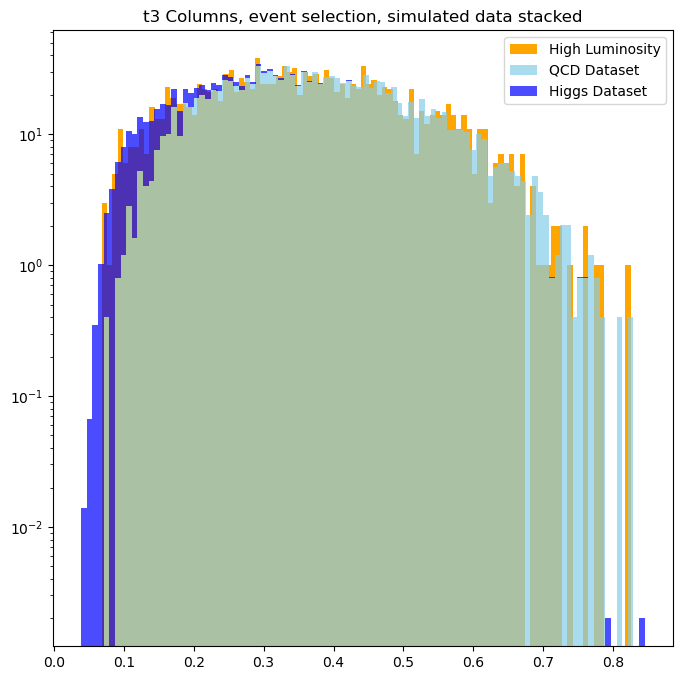

In [49]:
fig, ax = plt.subplots(nrows =1, ncols = 1, figsize = (8,8))

qt3_filt = qcd['t3'][qcd_data_filter]
ht3_filt = higgs['t3'][higgs_data_filter]
t3hl_filt = t3h[hlum_data_filter]
i = np.zeros(np.size(qt3_filt))
ii = np.zeros(np.size(ht3_filt))
iii = np.zeros(np.size(t3hl_filt))
i[:] = sh1
ii[:] = sh2
iiii[:] = sh4
ax.hist(t3hl_filt, 100,weights = iiii, color =high_color, alpha = alpha_h, label = 'High Luminosity', density =False)
ax.hist((qt3_filt,ht3_filt), 100, weights = (i,ii), color = ('skyblue', higgs_color), alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax.legend()
ax.set_yscale('log')
ax.set_title('t3 Columns, event selection, simulated data stacked')
plt.plot()

## This significance using t3 data seems to correlate well with the simulated higgs data, as the observed significance is close to the estimated significance. Additionally, the stacked simulated data very closly matches the observed histogram. This produces a mathematical, graphical, and qualitative congruence that indicates a significant measurement.

# 2 Low luminosity data

    Do as before with the high luminosity data and comment on the difference.


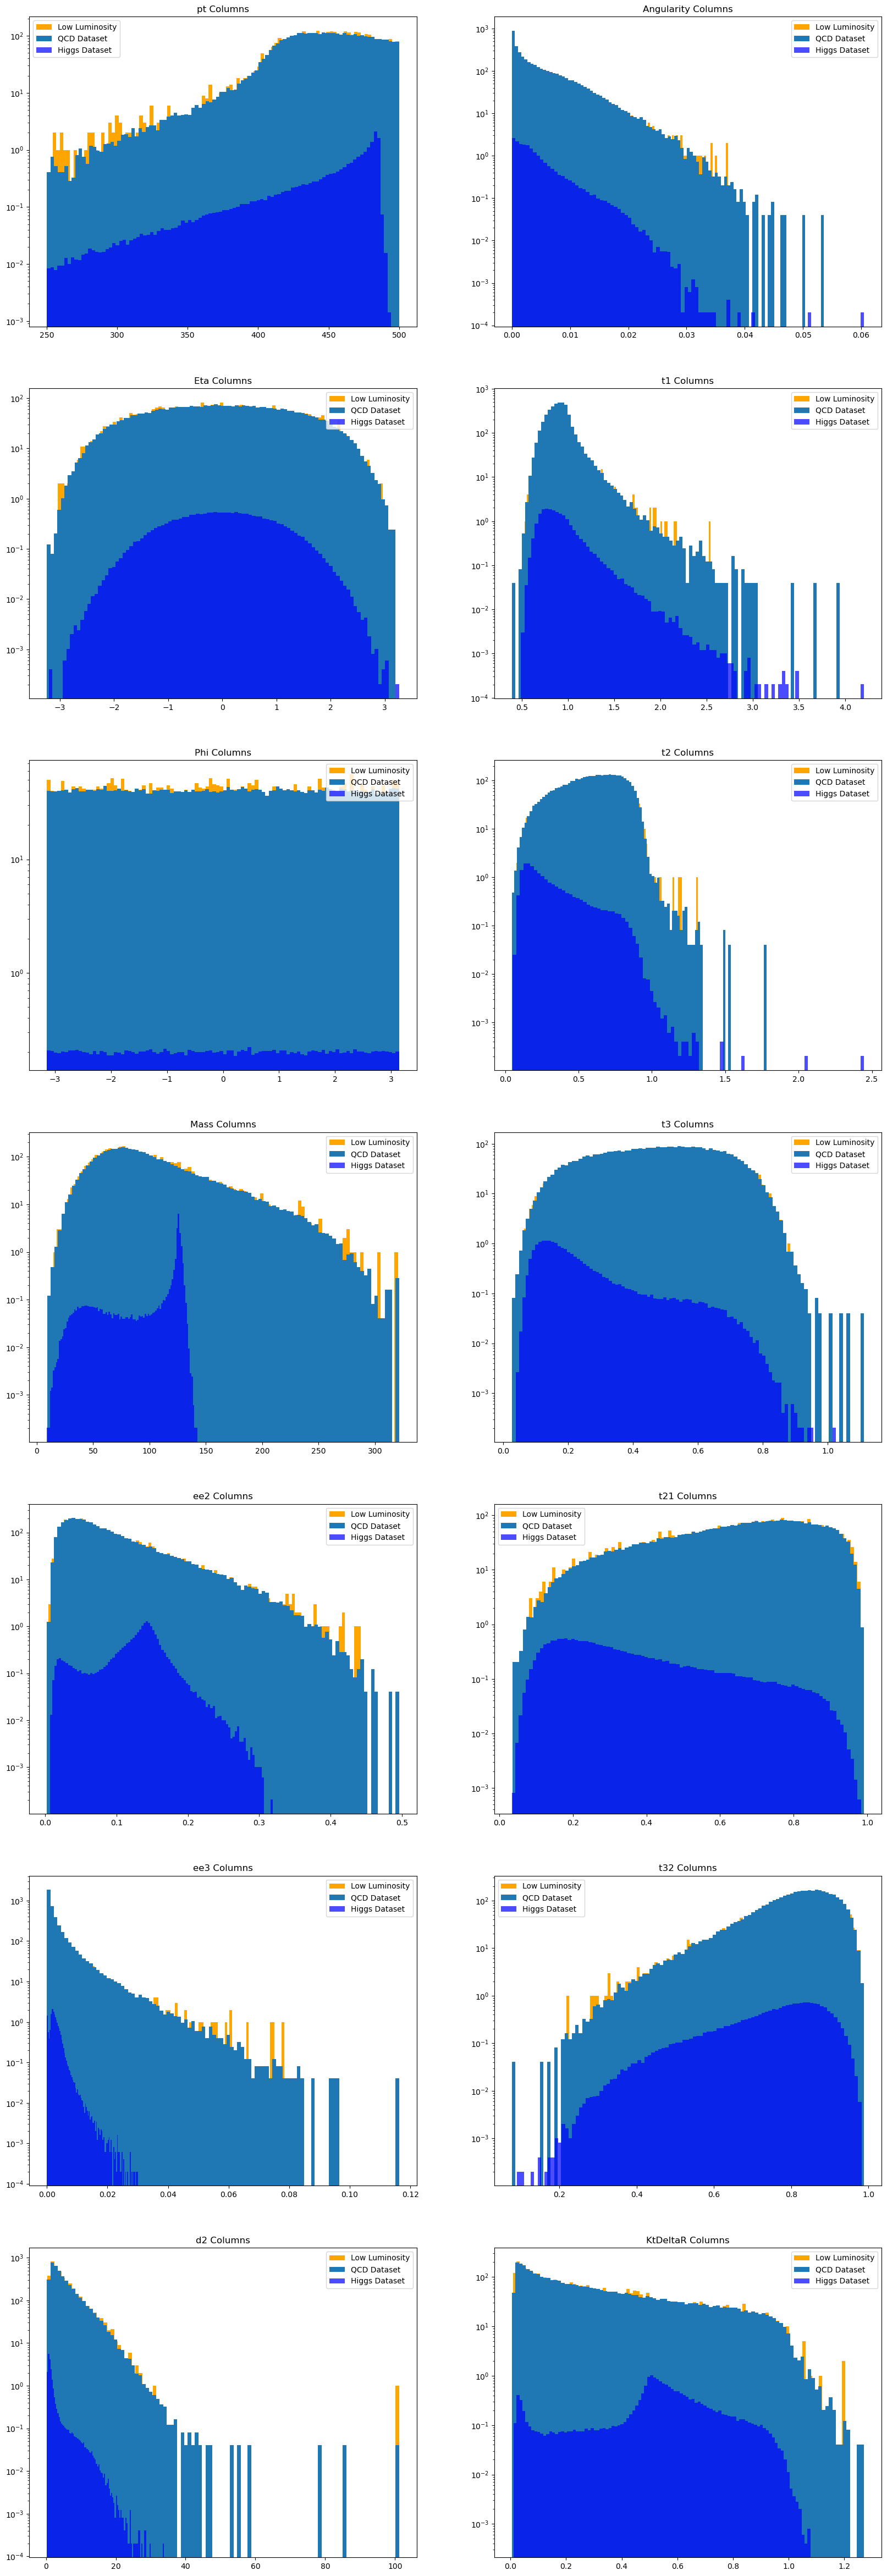

In [53]:
fig, ax = plt.subplots(nrows =7, ncols = 2, figsize = (20,60))

sl1 = 4060/1.005/100000
sl2 = (4060/1.005)*0.005/100000
sl3 = 1
sl4 = 1
i = np.zeros(100000)
ii = np.zeros(100000)
iii = np.zeros(np.size(massl))
iiii = np.zeros(np.size(massh))
i[:] = sl1
ii[:] = sl2
iii[:] = sl3
iiii[:] = sl4

low_color = 'orange'
high_color = 'orange'
higgs_color = 'blue'

alpha_l = 1
alpha_h = 1
alpha_qcd = 1
alpha_higgs = 0.7

ax[0,0].hist(ptl, 100, weights = iii, color = low_color, alpha = alpha_l, label = 'Low Luminosity', density = False)
ax[0,0].hist(qcd['pt'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[0,0].hist(higgs['pt'], 100, weights = ii,color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[0,0].legend()
ax[0,0].set_yscale('log')
ax[0,0].set_title('pt Columns')

ax[1,0].hist(etal, 100, weights = iii,color = low_color, alpha = alpha_l, label = 'Low Luminosity', density = False)
ax[1,0].hist(qcd['eta'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[1,0].hist(higgs['eta'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[1,0].legend()
ax[1,0].set_yscale('log')
ax[1,0].set_title('Eta Columns')

ax[2,0].hist(phil, 100, weights = iii,color = low_color, alpha = alpha_l, label = 'Low Luminosity', density = False)
ax[2,0].hist(qcd['phi'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[2,0].hist(higgs['phi'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[2,0].legend()
ax[2,0].set_yscale('log')
ax[2,0].set_title('Phi Columns')

ax[3,0].hist(massl, 100, weights = iii,color = low_color, alpha = alpha_l, label = 'Low Luminosity', density = False)
ax[3,0].hist(qcd['mass'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[3,0].hist(higgs['mass'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[3,0].legend()
ax[3,0].set_yscale('log')
ax[3,0].set_title('Mass Columns')

ax[4,0].hist(ee2l, 100,weights = iii, color = low_color, alpha =alpha_l, label = 'Low Luminosity', density = False)
ax[4,0].hist(qcd['ee2'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[4,0].hist(higgs['ee2'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[4,0].legend()
ax[4,0].set_yscale('log')
ax[4,0].set_title('ee2 Columns')

ax[5,0].hist(ee3l, 100,weights = iii, color = low_color, alpha = alpha_l, label = 'Low Luminosity', density = False)
ax[5,0].hist(qcd['ee3'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[5,0].hist(higgs['ee3'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[5,0].legend()
ax[5,0].set_yscale('log')
ax[5,0].set_title('ee3 Columns')

ax[6,0].hist(d2l, 100,weights = iii, color = low_color, alpha = alpha_l, label = 'Low Luminosity', density =False)
ax[6,0].hist(qcd['d2'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[6,0].hist(higgs['d2'], 100, weights = ii, color =higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[6,0].legend()
ax[6,0].set_yscale('log')
ax[6,0].set_title('d2 Columns')

ax[0,1].hist(angularityl, 100, weights = iii, color = low_color, alpha = alpha_l, label = 'Low Luminosity', density = False)
ax[0,1].hist(qcd['angularity'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[0,1].hist(higgs['angularity'], 100, weights = ii, color =higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[0,1].legend()
ax[0,1].set_yscale('log')
ax[0,1].set_title('Angularity Columns')

ax[1,1].hist(t1l, 100,weights = iii, color =low_color, alpha =alpha_l, label = 'Low Luminosity', density = False)
ax[1,1].hist(qcd['t1'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[1,1].hist(higgs['t1'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[1,1].legend()
ax[1,1].set_yscale('log')
ax[1,1].set_title('t1 Columns')

ax[2,1].hist(t2l, 100,weights = iii, color = low_color, alpha =alpha_l, label = 'Low Luminosity', density = False)
ax[2,1].hist(qcd['t2'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[2,1].hist(higgs['t2'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[2,1].legend()
ax[2,1].set_yscale('log')
ax[2,1].set_title('t2 Columns')

ax[3,1].hist(t3l, 100, weights = iii,color = low_color, alpha = alpha_l, label = 'Low Luminosity', density = False)
ax[3,1].hist(qcd['t3'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[3,1].hist(higgs['t3'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[3,1].legend()
ax[3,1].set_yscale('log')
ax[3,1].set_title('t3 Columns')

ax[4,1].hist(t21l, 100,weights = iii, color = low_color, alpha = alpha_l, label = 'Low Luminosity', density = False)
ax[4,1].hist(qcd['t21'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[4,1].hist(higgs['t21'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[4,1].legend()
ax[4,1].set_yscale('log')
ax[4,1].set_title('t21 Columns')

ax[5,1].hist(t32l, 100,weights = iii, color = low_color, alpha = alpha_l, label = 'Low Luminosity', density = False)
ax[5,1].hist(qcd['t32'], 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[5,1].hist(higgs['t32'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[5,1].legend()
ax[5,1].set_yscale('log')
ax[5,1].set_title('t32 Columns')

ax[6,1].hist(KtDeltaRl, 100, weights = iii, color = low_color, alpha = alpha_l, label = 'Low Luminosity', density = False)
ax[6,1].hist(qcd['KtDeltaR'], 100, weights = i, alpha =alpha_qcd, label = 'QCD Dataset', density = False)
ax[6,1].hist(higgs['KtDeltaR'], 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[6,1].legend()
ax[6,1].set_yscale('log')
ax[6,1].set_title('KtDeltaR Columns')
plt.show()

In [54]:
## Im looking for graphs in which features present in the dark blue (expected signals) correlate with features present in the orange (measured data) when compared against the light blue (expected background)

#t21, ee2, KtDeltaR, mass have candidates in the Low Luminosity data

In [55]:
#for mass
start = 100
end = 150
lst = list(range(start,end,1))

x = 0
for xx in lst:
    Lcut = massl[massl < xx]
    qcut = qcd['mass'][qcd['mass'] < xx]
    qsize = (np.size(qcut))*sl1
    Lsize = (np.size(Lcut))-qsize
    sig = (Lsize)/(qsize**(1/2))
    y = np.append(x,sig)
    x = y
a= [range(0,np.size(x)),x]
maxy = (np.max(a[1]))
input_list = x
max_value = np.argmax(input_list)
v = list(zip(lst,y))
print('(Cutting Right) location and significance is ' + str(v[max_value]))


lst2 = list(range(start,end,1))
x2 = 0
index = range(1, np.size(lst2))
for xx2 in lst2:
    Lcut2 = massl[massl > xx2]
    qcut2 = qcd['mass'][qcd['mass'] > xx2]
    qsize2 = (np.size(qcut2))*sl1
    Lsize2 = (np.size(Lcut2))-qsize2
    sig2 = Lsize2/(qsize2**(1/2))
    y2 = np.append(x2,sig2)
    x2 = y2
a2= [range(0,np.size(x2)),x2]
maxy2 = (np.max(a2[1]))
input_list2 = x2
max_value2 = np.argmax(input_list2)
v2 = list(zip(lst2,y2))
print('(Cutting Left) location and significance is ' + str(v2[max_value2]))

Lcut3 = massl[(massl > v2[max_value2][0]) & (massl < v[max_value][0])]
qcut3 = qcd['mass'][(qcd['mass'] > v2[max_value2][0]) & (qcd['mass'] < v[max_value][0])]
qsize3 = np.size(qcut3)*sl1
Lsize3 = np.size(Lcut3)-qsize3
sig3 = Lsize3/(qsize3**(1/2))
print('Significance between cuts '+str(sig3))


(Cutting Right) location and significance is (141, 1.0759188229210301)
(Cutting Left) location and significance is (111, 1.0617900681280315)
Significance between cuts 2.8028481749633736


#### The interval here does not strongly correlate with the very fine peak produced in the expected higgs mass data set. I am going to try another feature.

In [56]:
#for ee2
start = 0.1
end = 0.2
lst = list(np.linspace(start,end,100))

x = 0
for xx in lst:
    Lcut = ee2l[ee2l < xx]
    qcut = qcd['ee2'][qcd['ee2'] < xx]
    qsize = (np.size(qcut))*sl1
    Lsize = (np.size(Lcut))-qsize
    sig = (Lsize)/(qsize**(1/2))
    y = np.append(x,sig)
    x = y
a= [range(0,np.size(x)),x]
maxy = (np.max(a[1]))
input_list = x
max_value = np.argmax(input_list)
v = list(zip(lst,y))
print('(Cutting Right) location and significance is ' + str(v[max_value]))

x2 = 0
for xx2 in lst:
    Lcut2 = ee2l[ee2l > xx2]
    qcut2 = qcd['ee2'][qcd['ee2'] > xx2]
    qsize2 = (np.size(qcut2))*sl1
    Lsize2 = (np.size(Lcut2))-qsize2
    sig2 = Lsize2/(qsize2**(1/2))
    y2 = np.append(x2,sig2)
    x2 = y2
a2= [range(0,np.size(x2)),x2]
maxy2 = (np.max(a2[1]))
input_list2 = x2
max_value2 = np.argmax(input_list2)
v2 = list(zip(lst,y2))
print('(Cutting Left) location and significance is ' + str(v2[max_value2]))

Lcut3 = ee2l[(ee2l > v2[max_value2][0]) & (ee2l < v[max_value][0])]
qcut3 = qcd['ee2'][(qcd['ee2'] > v2[max_value2][0]) & (qcd['ee2'] < v[max_value][0])]
qsize3 = np.size(qcut3)*sl1
Lsize3 = np.size(Lcut3)-qsize3
sig3 = Lsize3/(qsize3**(1/2))
print('Significance between cuts '+str(sig3))

(Cutting Right) location and significance is (0.15454545454545454, 0.9071640313424704)
(Cutting Left) location and significance is (0.10101010101010102, 0.5378615023904353)
Significance between cuts 1.6136158928687785


#### This interval much more closely matches the expected feature. The cuts capture a small area above a peak in the expected higgs data. I will use this feature to analyze another.

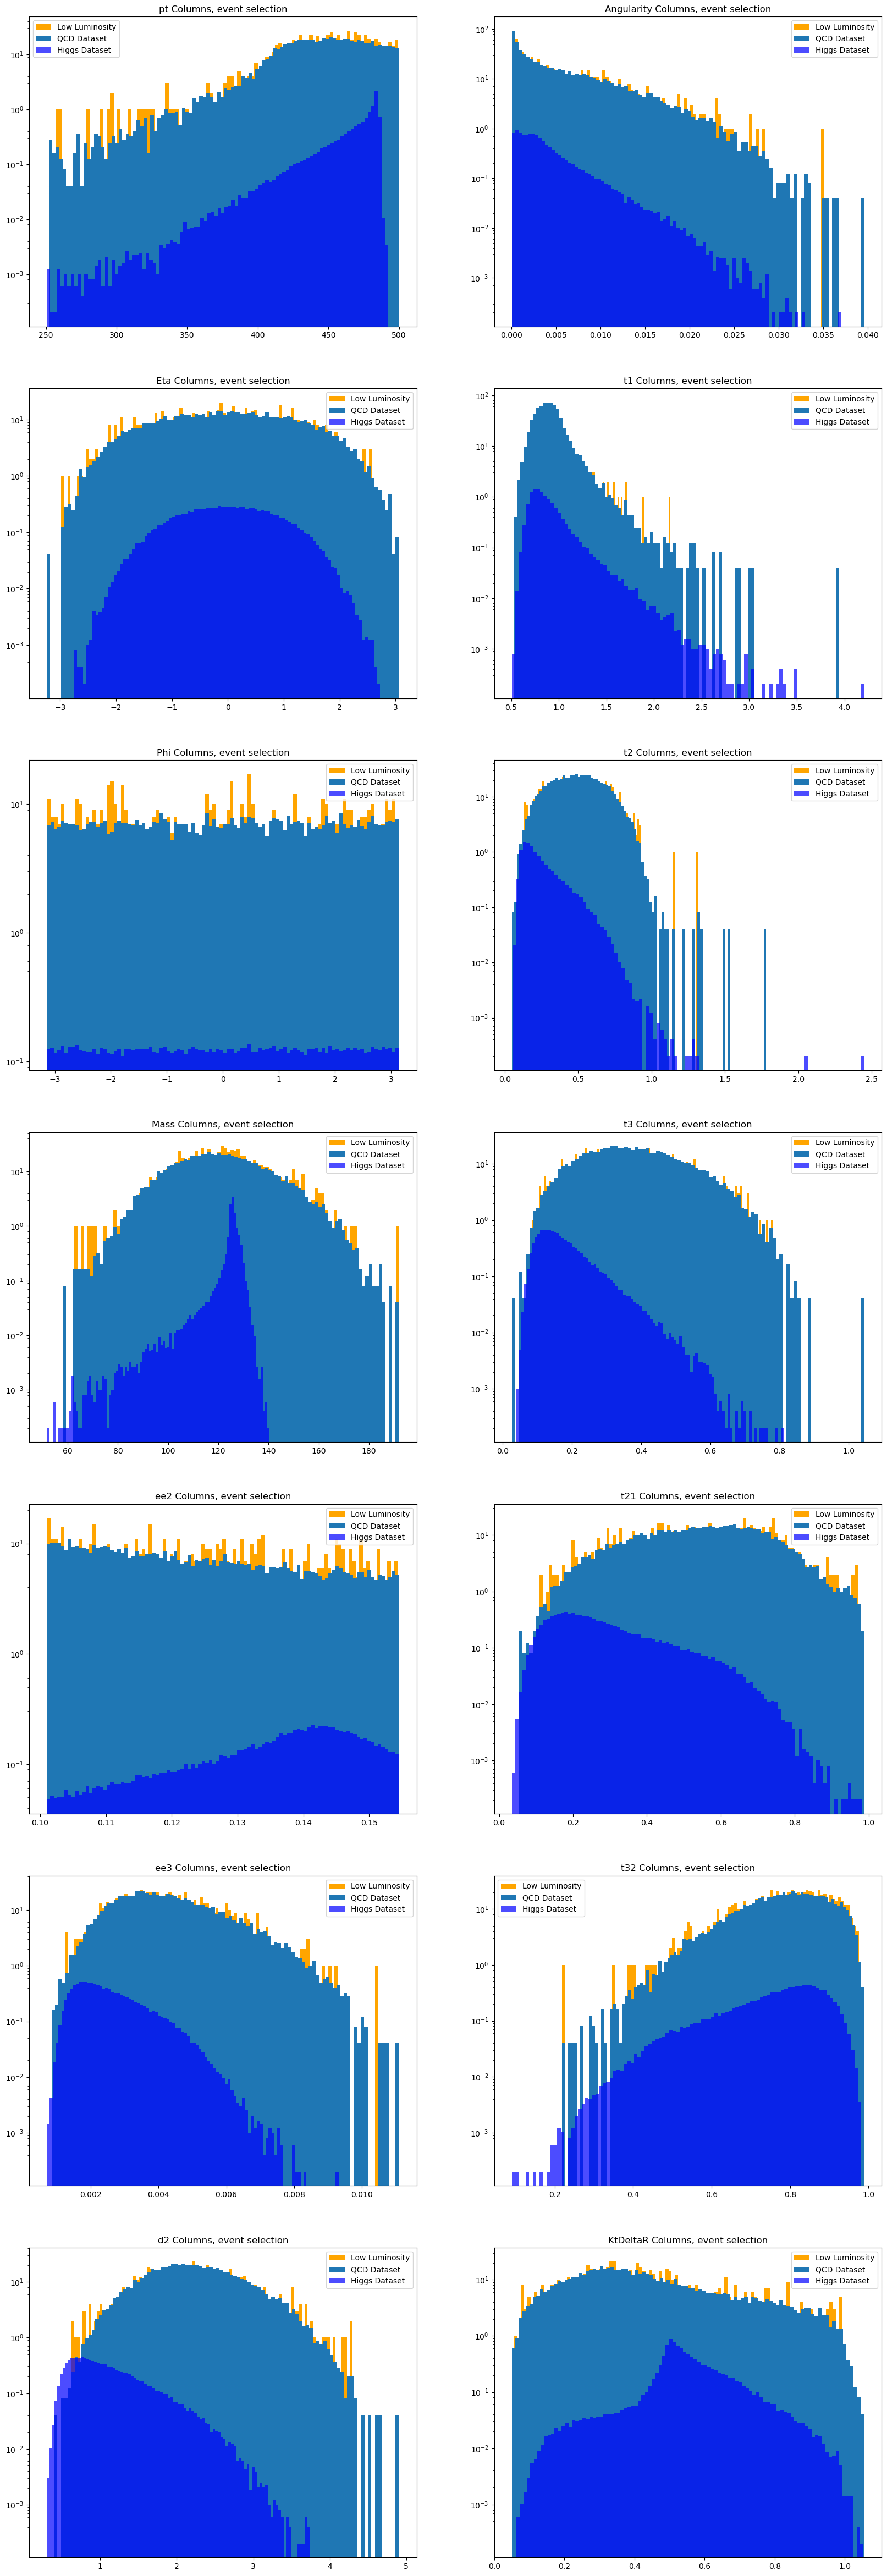

In [57]:
#plotting each feature given selected ee2 feature
qcd_data_filter =(qcd['ee2'] > v2[max_value2][0]) & (qcd['ee2'] < v[max_value][0])
llum_data_filter = (ee2l > v2[max_value2][0]) & (ee2l < v[max_value][0])
higgs_data_filter = (higgs['ee2'] > v2[max_value2][0]) & (higgs['ee2'] <v[max_value][0])


fig, ax = plt.subplots(nrows =7, ncols = 2, figsize = (20,60))

qpt_filt = qcd['pt'][qcd_data_filter]
hpt_filt = higgs['pt'][higgs_data_filter]
ptll_filt = ptl[llum_data_filter]
i = np.zeros(np.size(qpt_filt))
ii = np.zeros(np.size(hpt_filt))
iii = np.zeros(np.size(ptll_filt))
i[:] = sl1
ii[:] = sl2
iii[:] = sl3
ax[0,0].hist(ptll_filt, 100, weights = iii, color = high_color, alpha = alpha_h, label = 'Low Luminosity', density = False)
ax[0,0].hist(qpt_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[0,0].hist(hpt_filt, 100, weights = ii,color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[0,0].legend()
ax[0,0].set_yscale('log')
ax[0,0].set_title('pt Columns, event selection')

qeta_filt = qcd['eta'][qcd_data_filter]
heta_filt = higgs['eta'][higgs_data_filter]
etall_filt = etal[llum_data_filter]
i = np.zeros(np.size(qpt_filt))
ii = np.zeros(np.size(hpt_filt))
iii = np.zeros(np.size(etall_filt))
i[:] = sl1
ii[:] = sl2
iii[:] = sl3
ax[1,0].hist(etall_filt, 100, weights = iii,color = high_color, alpha =alpha_h, label = 'Low Luminosity', density = False)
ax[1,0].hist(qeta_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[1,0].hist(heta_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[1,0].legend()
ax[1,0].set_yscale('log')
ax[1,0].set_title('Eta Columns, event selection')

qphi_filt = qcd['phi'][qcd_data_filter]
hphi_filt = higgs['phi'][higgs_data_filter]
phill_filt = phil[llum_data_filter]
i = np.zeros(np.size(qpt_filt))
ii = np.zeros(np.size(hpt_filt))
iii = np.zeros(np.size(phill_filt))
i[:] = sl1
ii[:] = sl2
iii[:] = sl3
ax[2,0].hist(phill_filt, 100, weights = iii,color = high_color, alpha =alpha_h, label = 'Low Luminosity', density = False)
ax[2,0].hist(qphi_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[2,0].hist(hphi_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[2,0].legend()
ax[2,0].set_yscale('log')
ax[2,0].set_title('Phi Columns, event selection')

qmass_filt = qcd['mass'][qcd_data_filter]
hmass_filt = higgs['mass'][higgs_data_filter]
massll_filt = massl[llum_data_filter]
i = np.zeros(np.size(qmass_filt))
ii = np.zeros(np.size(hmass_filt))
iii = np.zeros(np.size(massll_filt))
i[:] = sl1
ii[:] = sl2
iii[:] = sl3
ax[3,0].hist(massll_filt, 100, weights = iii,color =high_color, alpha =alpha_h, label = 'Low Luminosity', density = False)
ax[3,0].hist(qmass_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[3,0].hist(hmass_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[3,0].legend()
ax[3,0].set_yscale('log')
ax[3,0].set_title('Mass Columns, event selection')

qee2_filt = qcd['ee2'][qcd_data_filter]
hee2_filt = higgs['ee2'][higgs_data_filter]
ee2ll_filt = ee2l[llum_data_filter]
i = np.zeros(np.size(qee2_filt))
ii = np.zeros(np.size(hee2_filt))
iii = np.zeros(np.size(ee2ll_filt))
i[:] = sl1
ii[:] = sl2
iii[:] = sl3
ax[4,0].hist(ee2ll_filt, 100,weights = iii, color = high_color, alpha = alpha_h, label = 'Low Luminosity', density = False)
ax[4,0].hist(qee2_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[4,0].hist(hee2_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[4,0].legend()
ax[4,0].set_yscale('log')
ax[4,0].set_title('ee2 Columns, event selection')

qee3_filt = qcd['ee3'][qcd_data_filter]
hee3_filt = higgs['ee3'][higgs_data_filter]
ee3ll_filt = ee3l[llum_data_filter]
i = np.zeros(np.size(qee3_filt))
ii = np.zeros(np.size(hee3_filt))
iii = np.zeros(np.size(ee3ll_filt))
i[:] = sl1
ii[:] = sl2
iii[:] = sl3
ax[5,0].hist(ee3ll_filt, 100,weights = iii, color = high_color, alpha =alpha_h, label = 'Low Luminosity', density = False)
ax[5,0].hist(qee3_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[5,0].hist(hee3_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[5,0].legend()
ax[5,0].set_yscale('log')
ax[5,0].set_title('ee3 Columns, event selection')

qd2_filt = qcd['d2'][qcd_data_filter]
hd2_filt = higgs['d2'][higgs_data_filter]
d2ll_filt = d2l[llum_data_filter]
i = np.zeros(np.size(qd2_filt))
ii = np.zeros(np.size(hd2_filt))
iii = np.zeros(np.size(d2ll_filt))
i[:] = sl1
ii[:] = sl2
iii[:] = sl3
ax[6,0].hist(d2ll_filt, 100,weights = iii, color =high_color, alpha = alpha_h, label = 'Low Luminosity', density =False)
ax[6,0].hist(qd2_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[6,0].hist(hd2_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[6,0].legend()
ax[6,0].set_yscale('log')
ax[6,0].set_title('d2 Columns, event selection')

qang_filt = qcd['angularity'][qcd_data_filter]
hang_filt = higgs['angularity'][higgs_data_filter]
angll_filt = angularityl[llum_data_filter]
i = np.zeros(np.size(qang_filt))
ii = np.zeros(np.size(hang_filt))
iii = np.zeros(np.size(angll_filt))
i[:] = sl1
ii[:] = sl2
iii[:] = sl3
ax[0,1].hist(angll_filt, 100, weights = iii, color = high_color, alpha = alpha_h, label = 'Low Luminosity', density = False)
ax[0,1].hist(qang_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[0,1].hist(hang_filt, 100, weights = ii, color = higgs_color, alpha =alpha_higgs, label = 'Higgs Dataset', density = False)
ax[0,1].legend()
ax[0,1].set_yscale('log')
ax[0,1].set_title('Angularity Columns, event selection')

qt1_filt = qcd['t1'][qcd_data_filter]
ht1_filt = higgs['t1'][higgs_data_filter]
t1ll_filt = t1l[llum_data_filter]
i = np.zeros(np.size(qt1_filt))
ii = np.zeros(np.size(ht1_filt))
iii = np.zeros(np.size(t1ll_filt))
i[:] = sl1
ii[:] = sl2
iii[:] = sl3
ax[1,1].hist(t1ll_filt, 100,weights = iii, color =high_color, alpha = alpha_h, label = 'Low Luminosity', density = False)
ax[1,1].hist(qt1_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[1,1].hist(ht1_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[1,1].legend()
ax[1,1].set_yscale('log')
ax[1,1].set_title('t1 Columns, event selection')

qt2_filt = qcd['t2'][qcd_data_filter]
ht2_filt = higgs['t2'][higgs_data_filter]
t2ll_filt = t2l[llum_data_filter]
i = np.zeros(np.size(qt2_filt))
ii = np.zeros(np.size(ht2_filt))
iii = np.zeros(np.size(t2ll_filt))
i[:] = sl1
ii[:] = sl2
iii[:] = sl3
ax[2,1].hist(t2ll_filt, 100,weights = iii, color = high_color, alpha =alpha_h, label = 'Low Luminosity', density = False)
ax[2,1].hist(qt2_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[2,1].hist(ht2_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[2,1].legend()
ax[2,1].set_yscale('log')
ax[2,1].set_title('t2 Columns, event selection')

qt3_filt = qcd['t3'][qcd_data_filter]
ht3_filt = higgs['t3'][higgs_data_filter]
t3ll_filt = t3l[llum_data_filter]
i = np.zeros(np.size(qt3_filt))
ii = np.zeros(np.size(ht3_filt))
iii = np.zeros(np.size(t3ll_filt))
i[:] = sl1
ii[:] = sl2
iii[:] = sl3
ax[3,1].hist(t3ll_filt, 100, weights = iii,color = high_color, alpha = alpha_h, label = 'Low Luminosity', density = False)
ax[3,1].hist(qt3_filt, 100, weights = i, alpha =alpha_qcd, label = 'QCD Dataset', density = False)
ax[3,1].hist(ht3_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[3,1].legend()
ax[3,1].set_yscale('log')
ax[3,1].set_title('t3 Columns, event selection')

qt21_filt = qcd['t21'][qcd_data_filter]
ht21_filt = higgs['t21'][higgs_data_filter]
t21ll_filt = t21l[llum_data_filter]
i = np.zeros(np.size(qt21_filt))
ii = np.zeros(np.size(ht21_filt))
iii = np.zeros(np.size(t21ll_filt))
i[:] = sl1
ii[:] = sl2
iii[:] = sl3
ax[4,1].hist(t21ll_filt, 100,weights = iii, color = high_color, alpha = alpha_h, label = 'Low Luminosity', density = False)
ax[4,1].hist(qt21_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[4,1].hist(ht21_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[4,1].legend()
ax[4,1].set_yscale('log')
ax[4,1].set_title('t21 Columns, event selection')

qt32_filt = qcd['t32'][qcd_data_filter]
ht32_filt = higgs['t32'][higgs_data_filter]
t32ll_filt = t32l[llum_data_filter]
i = np.zeros(np.size(qt32_filt))
ii = np.zeros(np.size(ht32_filt))
iii = np.zeros(np.size(t32ll_filt))
i[:] = sl1
ii[:] = sl2
iii[:] = sl3
ax[5,1].hist(t32ll_filt, 100,weights = iii, color = high_color, alpha = alpha_h, label = 'Low Luminosity', density = False)
ax[5,1].hist(qt32_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[5,1].hist(ht32_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[5,1].legend()
ax[5,1].set_yscale('log')
ax[5,1].set_title('t32 Columns, event selection')

qKtDeltaR_filt = qcd['KtDeltaR'][qcd_data_filter]
hKtDeltaR_filt = higgs['KtDeltaR'][higgs_data_filter]
KtDeltaRll_filt = KtDeltaRl[llum_data_filter]
i = np.zeros(np.size(qKtDeltaR_filt))
ii = np.zeros(np.size(hKtDeltaR_filt))
iii = np.zeros(np.size(KtDeltaRll_filt))
i[:] = sl1
ii[:] = sl2
iii[:] = sl3
ax[6,1].hist(KtDeltaRll_filt, 100, weights = iii, color = high_color, alpha = alpha_h, label = 'Low Luminosity', density = False)
ax[6,1].hist(qKtDeltaR_filt, 100, weights = i, alpha = alpha_qcd, label = 'QCD Dataset', density = False)
ax[6,1].hist(hKtDeltaR_filt, 100, weights = ii, color = higgs_color, alpha = alpha_higgs, label = 'Higgs Dataset', density = False)
ax[6,1].legend()
ax[6,1].set_yscale('log')
ax[6,1].set_title('KtDeltaR Columns, event selection')
plt.show()

In [58]:
# of these, none obviously have features that can be exploited for increasing significance.
# t2,ee3 may be useful.

In [59]:
start = np.min(qt2_filt)+0.001
end = 0.3
lst = list(np.linspace(start,end,200))

x = 0
for xx in lst:
    Lcut = t2ll_filt[t2ll_filt < xx]
    qcut = qt2_filt[qt2_filt < xx]
    qsize = (np.size(qcut))*sl1
    Lsize = np.size(Lcut)-qsize
    sig = (Lsize)/(qsize**(1/2))
    y = np.append(x,sig)
    x = y
a= [range(0,np.size(x)),x]
maxy = (np.max(a[1]))
input_list = x
max_value = np.argmax(input_list)
v = list(zip(lst,y))
print('(Cutting Right) location and significance is ' + str(v[max_value]))

x2 = 0
for xx2 in lst:
    Lcut = t2ll_filt[t2ll_filt > xx]
    qcut = qt2_filt[qt2_filt > xx]
    qsize = (np.size(qcut))*sl1
    Lsize = (np.size(Lcut))-qsize
    sig2 = (Lsize)/(qsize**(1/2))
    y2 = np.append(x2,sig2)
    x2 = y2
a2= [range(0,np.size(x2)),x2]
maxy2 = (np.max(a2[1]))
input_list2 = x2
max_value2 = np.argmax(input_list2)
v2 = list(zip(lst,y2))
print('(Cutting Left) location and significance is ' + str(v2[max_value2]))

Lcut3 = t2ll_filt[(t2ll_filt > v2[max_value2][0]) & (t2ll_filt < v[max_value][0])]
qcut3 = qt3_filt[(qt2_filt > v2[max_value2][0]) & (qt2_filt < v[max_value][0])]
qsize3 = (np.size(qcut3))*sl1
Lsize3 = (np.size(Lcut3))-qsize3
sig3 = (Lsize3)/(qsize3**(1/2))
print('Significance between cuts '+str(sig3))

(Cutting Right) location and significance is (0.2708592230488712, 3.5495746203278515)
(Cutting Left) location and significance is (0.04913592015984849, 0.7993893618838691)
Significance between cuts 3.406588388338062


### Even while evaluating two features, the low luminosity data set does not reach 5sigma significance. This is due to way in which we are calclating sigma. While using Nsignal/sqrt(Nbackground) the total amount of data has a large impact on the significance of the measurement. The order of magnitude difference between the total amount of high luminosity data and low luminosity data greatly affects the calculatable significance. An order of magnitude change (4,060 to 40,344 points) corresponds to about a 1/3 fall in significance. It will be difficult to prodcuce a 5 sigma certinty with this data.

# 3 95% Confidence Level of signal yields

    In the low luminosity data, the observed significance is less than 5σ

. We will calculate the 95% confidence level upper limit of signal yield.
Evaluate the expected 95% confidence level upper limit
Evaluate the observed 95% confidence level upper limit
Compare expectation to observation. Comment on your finding. 


#### Copying in code from above to obtain the cut datasets for mass used in determining significance, 95% confidence can be performed using poisson statistics. Mass was used as it was well defined in lab 7 using the expected datasets and gives a strong comparison.

In [61]:
#for mass
start = 100
end = 150
lst = list(range(start,end,1))

x = 0
for xx in lst:
    Lcut = massl[massl < xx]
    qcut = qcd['mass'][qcd['mass'] < xx]
    qsize = (np.size(qcut))*sl1
    Lsize = (np.size(Lcut))-qsize
    sig = (Lsize)/(qsize**(1/2))
    y = np.append(x,sig)
    x = y
a= [range(0,np.size(x)),x]
maxy = (np.max(a[1]))
input_list = x
max_value = np.argmax(input_list)
v = list(zip(lst,y))
print('(Cutting Right) location and significance is ' + str(v[max_value]))

lst2 = list(range(start,end,1))
x2 = 0
index = range(1, np.size(lst2))
for xx2 in lst2:
    Lcut2 = massl[massl > xx2]
    qcut2 = qcd['mass'][qcd['mass'] > xx2]
    qsize2 = (np.size(qcut2))*sl1
    Lsize2 = (np.size(Lcut2))-qsize2
    sig2 = Lsize2/(qsize2**(1/2))
    y2 = np.append(x2,sig2)
    x2 = y2
a2= [range(0,np.size(x2)),x2]
maxy2 = (np.max(a2[1]))
input_list2 = x2
max_value2 = np.argmax(input_list2)
v2 = list(zip(lst2,y2))
print('(Cutting Left) location and significance is ' + str(v2[max_value2]))

Lcut3 = massl[(massl > v2[max_value2][0]) & (massl < v[max_value][0])]
qcut3 = qcd['mass'][(qcd['mass'] > v2[max_value2][0]) & (qcd['mass'] < v[max_value][0])]
qsize3 = np.size(qcut3)*sl1
Lsize3 = np.size(Lcut3)-qsize3
sig3 = Lsize3/(qsize3**(1/2))
print('Significance between cuts '+str(sig3))

mu = np.mean(Lcut3)
confll = stats.poisson.isf(0.95, mu, loc=0)
print('95% confidence level in low luminosity data: ' + str(confll))

(Cutting Right) location and significance is (141, 1.0759188229210301)
(Cutting Left) location and significance is (111, 1.0617900681280315)
Significance between cuts 2.8028481749633736
95% confidence level in low luminosity data: 106.0


In [62]:
s1 = 20000/100000
s2 = 100/100000
i = np.zeros(100000)
ii = np.zeros(100000)
i[:] = s1
ii[:] = s2
hmass = higgs['mass']
qmass = qcd['mass']

hmassnum = hmass
qmassnum = qmass
#print(np.size(hmassnum))
#print(np.size(qmassnum))
#Ratio of points is correct for Nhiggs and Nqcd
####ADD NORMILAZATION FACTOR AT THE END. DIVIDE NP.SIZE(HIGGS) BY NORMALIZATION FACTOR TO KEEP DATA####

## loop evaluating each integer mass for highest significance
start =10
shift = start-1
lst = list(range(start,350,1))
x = 0
index = range(1, np.size(lst))
for xx in lst:
    hcut = hmassnum[hmassnum < xx]
    qcut = qmassnum[qmassnum < xx]
    hsize = np.size(hcut)*0.005
    qsize = np.size(qcut)
    sig = hsize/(qsize**(1/2))
    y = np.append(x,sig)
    x = y
a= [range(0,np.size(x)),x]
maxy = (np.max(a[1]))
input_list = x
max_value = np.argmax(input_list)
v = list(zip(lst,y))
print('(Cutting Right) location and significance is ' + str(v[max_value]))

start2 = 10
shift2 = start2-1
lst2 = list(range(start2,300,1))
x2 = 0
index = range(1, np.size(lst2))
for xx2 in lst2:
    hcut2 = hmassnum[hmassnum > xx2]
    qcut2 = qmassnum[qmassnum > xx2]
    hsize2 = np.size(hcut2)*0.005
    qsize2 = np.size(qcut2)
    sig2 = hsize2/(qsize2**(1/2))
    y2 = np.append(x2,sig2)
    x2 = y2

a2= [range(0,np.size(x2)),x2]
maxy2 = (np.max(a2[1]))
input_list2 = x2
max_value2 = np.argmax(input_list2)
v2 = list(zip(lst2,y2))
print('(Cutting Left) location and significance is ' + str(v2[max_value2]))

hcut3 = hmassnum[(hmassnum > v2[max_value2][0]) & (hmassnum < v[max_value][0])]
qcut3 = qmassnum[(qmassnum > v2[max_value2][0]) & (qmassnum < v[max_value][0])]
hsize3 = np.size(hcut3)*0.005
qsize3 = np.size(qcut3)
sig3 = hsize3/(qsize3**(1/2))
print('Significance between cuts '+str(sig3))

mu = np.mean(hcut3)
confh = stats.poisson.isf(0.95, mu, loc=0)
print('95% confidence level in expected data: ' + str(confh))

(Cutting Right) location and significance is (134, 1.7422797765603997)
(Cutting Left) location and significance is (121, 2.5088967923308125)
Significance between cuts 4.982345945367033
95% confidence level in expected data: 108.0


### The 95% confidence level are comparable in both, with the expected data having a higher mass than observed data. This is likely due to the wide interval observed near the expected peak in the observed data. This same wide interval was the reason mass was not used in cutting other features to increase the significance. I was not comfortable using the wide shape as a significant measurement representing a very narrow peak.